# Programação e Análise de Dados com Python
##### Programa de Pós-Graduação em Economia - PPGE

## Módulo 13 - Manipulação de Dados

###### Prof. Hilton Ramalho
###### Prof. Aléssio Almeida

## Objetivo
Desenvolver operações básicas sobre manipulação de dados usando *Python*, com destaque para seleção, limpeza, normalização, junção, empilhamento, pivotagem, tabelas de frequência, tabulação cruzada e organização dos dados.

## Conteúdo
1. Descrição dos dados
2. Seleção/filtro condicional de linhas
3. Descrição estatística
4. Deletando colunas/linhas
5. Agregação de dados
6. Combinação de data frames
7. Detecção de outliers
8. Dados ausentes (missing values)

# Montar pasta de arquivos do seu Google Drive

- Vamos compartilhar arquivos de dados uma pasta do Google Drive 
- Poderemos montá-la a cada sessão iniciada por um usuário 

- Rodar o procedimento abaixo, clicar no link do seu Gdrive, copiar o código de autorização e colar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


- Observe na pasta da barra lateral à esquerda:
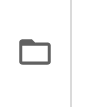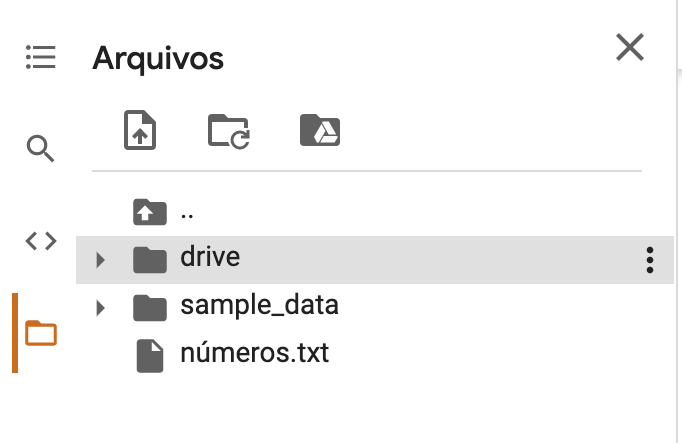 

## Criando um pandas data frame a partir de um dicionário de listas

In [ ]:
#Criando um data frame no Pandas
import pandas as pd
import numpy as np

np.random.seed(10)

data = {'Ano': [1, 1, 1, 1, 2, 2, 2, 2],
        'Produto': ['A', 'B', 'C', 'D','A', 'B', 'C', 'D'],
        'Preço': (np.random.random(8)*10).round(1)}

df = pd.DataFrame(data)
df

### Informações sobre a tipagem das colunas

- Método `.dtypes`.

In [ ]:
df.dtypes

### Informações sobre o formato da planilha de dados

- Método `.shape`.

In [ ]:
df.shape

### Informações sobre as colunas da planilha de dados

- Método `.columns`.

In [ ]:
df.columns

### Informações gerais sobre a planilha de dados

- Método `.info()`.

In [ ]:
df.info()

### Informações sobre a indexão das linhas da planilha de dados

- Método `.index`.

In [ ]:
df.index

# Manipulação de linhas e colunas de data frame

- Podemos selecionar e extrair colunas e linhas de um objeto data frame usando
  seus indexadores.

- Vamos ler dados de uma coleção de filmes e suas avaliações a partir do banco de dados provido pelo site https://movielens.org/

In [ ]:
import os
import pandas as pd

# Mudando diretório de trabalho
os.chdir('/content/drive/Shared drives/DS-PY/movielens')

# Checar qual é o diretório de trabalho
os.getcwd()

# Vamos ler a tabela movies
df_movies = pd.read_csv("movies.csv")
df_movies

In [ ]:
df_movies.info()

## Seleção de colunas

- Ao selecionar uma coluna de um data frame criamos um objeto do tipo `pandasSeries`.

In [ ]:
# Vamos criar uma variável para armazenar uma série do pandas 
title = df_movies['title']
print(title)
print(type(title))

In [ ]:
# Criando um variável série para a categoria do filme
categoria = df_movies['genres']
print(categoria)
print(type(categoria))

## Seleção de múltiplas colunas

- Ao selecionar múltiplas colunas de um data frame criaremos outro data frame.
- Para tanto, chamamos o objeto `df` e passamos uma lista como os nomes das colunas para indexar a seleção `df[  ['nome1', 'nome2', ...   ]     ]`.

In [ ]:
# Vamos ler a tabela movies
df_movies = pd.read_csv("movies.csv")
df_movies

In [ ]:
# Novo data frame apenas com o ID do filme e o título
df = df_movies[  ['movieId', 'title']   ]
df

## Seleção de linhas

- Podemos criar um subconjunto de um data frame a partir da seleção de linhas seguindo seus indexadores.

In [ ]:
# Vamos ler a tabela movies
df_movies = pd.read_csv("movies.csv")
df_movies

### Seleção de linhas 

- O método `.head()` selecionará as `n` primeiras linhas da planilha de dados.

In [ ]:
# 5 primeiras linhas (padrão)
df_movies.head()

In [ ]:
# 15 primeiras linhas
df_movies.head(15)

### Seleção de linhas 

- O método `.tail()` selecionará as `n` últimas linhas da planilha de dados.

In [ ]:
# 5 últimas linhas
df_movies.tail()

In [ ]:
# 10 últimas linhas
df_movies.tail(10)

### Seleção de linhas 

- O método `.loc` selecionará linhas específicas da planilha de dados a partir de seus indexadores.

In [ ]:
# Imprimir a planilha movies
df_movies

In [ ]:
# Selecionar 1ª linha
df_movies.loc[0]

In [ ]:
# Selecionar 2ª linha
df_movies.loc[1]

In [ ]:
# Selecionar da 1ª linha até a 11ª linha
df_movies.loc[0:10] 

In [ ]:
# Selecionar todas as linhas antes da 5 linha (inclusive a própria)
df_movies.loc[:4]

In [ ]:
# Selecionar todas as linhas após a 5 linha (inclusive a própria)
df_movies.loc[4:]

In [ ]:
# Selecionar várias linhas alternadas
df_movies.loc[ [0,10,15,120] ]

### Seleção de linhas 

- O método `.iloc` selecionará linhas específicas da planilha de dados a partir de seus indexadores, permitindo indexação retroativa (negativa).

In [ ]:
# Selecionar a última linha
df_movies.iloc[-1]

In [ ]:
# Selecionar as últimas 5 linhas
df_movies.iloc[-6:-1]

In [ ]:
# Selecionar a primeira e a última linha
df_movies.iloc[ [0,-1]  ]

### Seleção conjunta de linhas e de colunas 

- Os métodos `.loc` e `.iloc` permitem selecionar linhas e colunas específicas da planilha de dados a partir de seus indexadores.

```
df.loc[[linhas], [colunas]]
df.iloc[[indexador linha], [indexador coluna]]
```

In [ ]:
# Vamos ler a tabela de ratings (avaliações)
df_ratings = pd.read_csv('ratings.csv')
df_ratings

In [ ]:
# Vamos criar um novo DF selecionado as linhas de índice 1 e 50 e as colunas rating e timestamp
df_selecao = df_ratings.loc[  [1,50], ['rating', 'timestamp']  ]
df_selecao

In [ ]:
# Vamos criar um novo DF selecionado as linhas de índice 50 a 200 e as colunas userId e timestamp
df_selecao = df_ratings.loc[ 50:200, ['userId', 'timestamp']]
df_selecao

In [ ]:
# Selecionamos todas as linhas e algunas colunas pelos indexadores numéricos
df_selecao = df_ratings.iloc[:, [1, 2]]
df_selecao

In [ ]:
# Selecionamos todas as linhas (índice 5 a 100) e algunas colunas pelos indexadores numéricos
df_selecao = df_ratings.iloc[5:100, [0, 2]]
df_selecao

In [ ]:
# Selecionamos todas as linhas (índice 5 a 20 pulando 2 linhas) e todas as colunas
df_selecao = df_ratings.iloc[5:20:2, :]
df_selecao

In [ ]:
# Selecionamos todas as linhas (todas as linha pulando 2 linhas) e as colunas de 0 
# até antes da coluna 2
df_selecao = df_ratings.iloc[0: :2, 0:2]
df_selecao

In [ ]:
# Selecionamos todas as linhas (0 a 6) e as colunas de 0 
# até antes da coluna 3
df_selecao = df_ratings.iloc[0:6, :3]
df_selecao

In [ ]:
# Selecionamos todas as linhas (pulando 2) e as colunas  
# após coluna 3 (inclusive a mesma)
df_selecao = df_ratings.iloc[::2, 3:]
df_selecao

### Alterando nomes de colunas

**Exemplo** - Criar um novo data frame alterando o nome (máscara de indexador) de colunas selecionadas do data frame existente.

In [ ]:
# Planilha df_movies
df_movies

In [ ]:
# Selecionamos do objeto df uma lista com os indexadores de colunas desejadas em uma sequência
df_movies.columns = ['cod_filme', 'titulo', 'genero']
df_movies

In [ ]:
# Vamos ler a tabela de ratings (avaliações)
df_ratings = pd.read_csv('ratings.csv')
df_ratings

### Alterando nomes de colunas

**Exemplo** - Criar um novo data frame alterando o nome (máscara de indexador) de colunas selecionadas do data frame existente.

In [ ]:
# Renomear colunas
df_ratings.columns = ['cod_usuario', 'cod_filme', 'nota', 'data']

# Observe que a coluna data é timestamp
df_ratings.head()

### Alterando nomes de colunas

- Podemos usar o método `.rename` que é mais robusto e independe de sequenciamento, pois usará os indexadores originais.

```
  .rename(columns={'nome_original': 'novo_nome',...,'nome_originalR': 'novo_nomeR'})
```

#### Ajuda

```
import pandas as pd
help(pd.rename)
```

In [ ]:
# Vamos ler a tabela de ratings (avaliações)
df_ratings = pd.read_csv('ratings.csv')
df_ratings

## Método rename

- Por padrão, ele tira uma cópia do data frame e altare os nomes das colunas apenas na cópia.

**Exemplo** - vamos pegar o data frame original e a partir dele imprimir um novo data frame (cópia) com colunas renomeadas.

In [ ]:
# Renomear a coluna userId
df_ratings.rename(   columns={'userId': 'usuario'}  )

In [ ]:
# Note que essa alteração não modificou o DF original
df_ratings

- Como fazer a alteração permanente?
 - Atualizar a variável de data frame.
 - Usar o argumento `inplace=True`.

In [ ]:
df_renomeado = df_ratings.rename(   columns={'userId': 'usuario'}  )
df_renomeado

In [ ]:
df_ratings

In [ ]:
df_ratings = df_ratings.rename( columns={'userId': 'usuario'} )
df_ratings

- Usando `inplace=True`

In [ ]:
# Vamos ler a tabela ratings
df_ratings = pd.read_csv("ratings.csv")
df_ratings

In [ ]:
df_ratings.rename( columns={'userId': 'usuario'}, inplace=True )

In [ ]:
df_ratings

### Alterando nomes de colunas

- Podemos usar o método `.rename` com a opção de aplicação permanente *inplace=TRUE*

In [ ]:
# Vamos ler a tabela de ratings (avaliações)
df_ratings = pd.read_csv('ratings.csv')
df_ratings

**Exemplo** - Renomear múltiplas colunas.

In [ ]:
# Alteração permanente no DF original
df_ratings.rename(columns={'movieId': 'cod_filme', 'rating': 'nota', 
                           'timestamp': 'data', 'userId': 'cod_usuario'}, inplace=True)
df_ratings

# Criando/modificando colunas

- Podemos criar novas colunas em um data frame. Para tanto, devemos selecionar
  a coluna que será criada/alterada e impor uma regra de transformação.

```
df["inxador_coluna"] = ... transformação ....
```

- Para ilustrar, vamos carregar dados do sistema de Finanças Municipais para o estado da Paraíba no ano de 2015.

FINBRA - https://www.gov.br/tesouronacional/pt-br/estados-e-municipios/dados-consolidados/finbra-financas-municipais

O arquivo de dados se acha no diretório compartilha desse curso do Gdrive.
  

In [ ]:

import os
import pandas as pd

# Qual é atual diretório de trabalho?
os.getcwd()

# Definir diretório de trabalho para a pasta compartilhada
os.chdir('/content/drive/Shared drives/DS-PY/')

# Já com diretório de trabalho definido, importamos o arquivo pelo nome
# Informamos o separador correto
df = pd.read_csv('finbraPB2015.csv', sep = ';', decimal=',')

# Data frame
print(df.info())
df

**Exemplo** - vamos criar uma nova coluna **valor_percapita** que será o valor total gasto por população.

In [ ]:
# Criamos uma nova coluna. Selecionamos duas colunas para a divisão
df['valor_percapita'] = df['valor'] / df['pop']

# Visualizar data frame
df

**Exemplo** - vamos criar uma nova coluna **log_pop** que será a população em logaritmo.

In [ ]:
# Importamos o pacote numpy
import numpy as np

# Criamos uma nova coluna. Aplicamos o método numpy.log()
df['log_pop'] = np.log(  df['pop']  )  

# Visualizar data frame
df

#### Criando/modificando colunas -  Manipulando colunas datetime (data e horário) no Pandas

- O método `.to_datetime` converte uma data timestamp para `datetime`.

- Vamos ler dados de uma coleção de filmes e suas avaliações a partir do banco de dados provido pelo site https://movielens.org/

In [ ]:
import os
import pandas as pd

# Qual é atual diretório de trabalho?
os.getcwd()

# Definir diretório de trabalho para a pasta compartilhada
os.chdir('/content/drive/Shared drives/DS-PY/')

# Vamos ler a tabela de ratings (avaliações)
df_ratings = pd.read_csv('movielens/ratings.csv')
print(df_ratings.dtypes)
df_ratings

- Renomeamos as colunas de forma permanente.

In [ ]:
# renomear as colunas
df_ratings.rename( columns={'movieId': 'filme', 'rating': 'nota', 
                           'timestamp': 'data', 'userId': 'usuario'}, inplace=True )
df_ratings

- Vamos aplicar o método `pd.to_datetime` para converter a coluna "data" de timestamp para datetime.

```
pd.to_datetime(df["coluna_timestamp"], unit='unidades de segundo')
```

In [ ]:
# Selecionamos a columa que queremos modificar
# Usamos o método pd.to_datetime aplicado a coluna que será transformada
df_ratings['data'] = pd.to_datetime(df_ratings['data'], unit='s')
print(df_ratings.dtypes)
df_ratings

- **Exemplo** - vamos aplicar o método `pd.DatetimeIndex`criar uma nova coluna a partir da coluna "data", que agora já está codificada em `datetime`. Vamos criar a coluna **ano** extraindo o componente ano da coluna `datetime`.

In [ ]:
df_ratings['ano'] = pd.DatetimeIndex(df_ratings['data']).year
df_ratings

- **Exemplo** - vamos aplicar o método `pd.DatetimeIndex`criar uma nova coluna a partir da coluna "data", que agora já está codificada em `datetime`. Vamos criar a coluna **mes** extraindo o componente mes da coluna `datetime`.

In [ ]:
df_ratings['mes'] = pd.DatetimeIndex(df_ratings['data']).month
df_ratings

- **Exemplo** - vamos aplicar o método `pd.DatetimeIndex`criar uma nova coluna a partir da coluna "data", que agora já está codificada em `datetime`. Vamos criar a coluna **trimestre** extraindo o componente trimestre da coluna `datetime`.



In [ ]:
df_ratings['trimestre'] = pd.DatetimeIndex(df_ratings['data']).quarter
df_ratings

**Exemplo** - Conversão de data em texto para datetime no pandas.

In [ ]:
import pandas as pd

# criar um dicionário que coleciona listas
dados = {
    'data': ['2020-03-01', '2020-02-10', '2020-04-23'],
    'vendas': [100, 234, 456]
}

df = pd.DataFrame(dados)
print(df.info())
df

In [ ]:
# Converter texto para datetime
df['data'] =  pd.to_datetime(df['data'])
print(df.info())
df

In [ ]:
# Criar a coluna ano
df['ano'] = pd.DatetimeIndex(df['data']).year
df

In [ ]:
import pandas as pd

# criar um dicionário que coleciona listas
dados = {
    'data': ['01/03/2020', '10/02/2020', '23/04/2020'],
    'vendas': [140, 214, 156]
}

df = pd.DataFrame(dados)
print(df.info())
df

In [ ]:
# Modificar a coluna data convertendo de texto para o padrão datetime internacional
# yyyy-mm-dd
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
print(df.info())
df

In [ ]:
df['dia'] = pd.DatetimeIndex(df['data']).day
df

# Criando/modificando colunas

- Mais exemplos usando transformações com métodos do `numpy`.

**Exemplo** - vamos criar uma nova coluna **semestre** a partir do método de condicionante:

-  `numpy.where(condição, valor se verdadeiro, valor se falso)`.

```
import numpy as np
help(np.where)
```

In [ ]:
print(df_ratings.info())
df_ratings

In [ ]:
import numpy as np

# Usando o método np.where
df_ratings['semestre'] = np.where(df_ratings['mes'] > 6, 2, 1)
df_ratings

In [ ]:
# Usando o método np.where
df_ratings['pior_avaliacao'] = np.where(df_ratings['nota'] <= 3, True, False)
df_ratings

**Exemplo** - vamos modificar a coluna **semestre** a partir do método de `.loc` de seleção múltipla de linhas e colunas.


In [ ]:
# Localizamos todas as linhas cujo mês é menor ou igual a 6 e selecionamos a 
# coluna semestre. Substituimos os valores por uma string
df_ratings.loc[df_ratings.mes <= 6, 'semestre'] = '1º Semestre'
# Localizamos todas as linhas cujo mês é maior 6 e selecionamos a 
# coluna semestre. Substituimos os valores por uma string
df_ratings.loc[df_ratings.mes > 6, 'semestre'] = '2º Semestre'
# Resultado
df_ratings

# Removendo colunas

- Podemos remover colunas em um data frame usando o método `.drop`.

```
df.drop( columns=['nome_coluna1', ..., 'nome_colunaN'] )
```

#### Ajuda
```
import pandas as pd
help(pd.drop)
```


**Exemplo** - vamos remover as colunas `mes` e `trimestre`.

In [ ]:
print(df_ratings.info())
df_ratings

**Exemplo** - Remover as colunas trimestre e mes.

In [ ]:
# Remoção apenas na cópia do data frame
df_ratings.drop(columns=['mes', 'trimestre'])

In [ ]:
# Verificar o data frame original
df_ratings

**Exemplo** - Remover colunas de forma permanente.

In [ ]:
# df_ratings = df_ratings.drop(columns=['mes', 'trimestre'])
df_ratings.drop(columns=['mes', 'trimestre'], inplace=True)
df_ratings

In [ ]:
# Removendo a coluna semester
df_ratings.drop(columns=['semestre'], inplace=True)
df_ratings

# Remoção de linhas

- Podemos remover linhas de um data frame usando diferentes métodos:
  - `.drop_duplicates` - remove todas as linhas duplicadas dadas colunas selecionadas.
  - `.drop(df.index('indice_linha))` ou `.drop(df.index(['indice_linhas']))` - remove linhas segundo indexadores.

In [ ]:
print(df_ratings.info())
df_ratings

In [ ]:
df = df_ratings.drop_duplicates(subset=['usuario'])
df

In [ ]:
# Resumo
print(df_ratings.info())
print(df.info())

- **Exemplo** - deletar linhas duplicadas preservando a última linha repetida.

```
df.drop_duplicates(subset=['nome_coluna], keep='last')
```


In [ ]:
df1 = df_ratings.drop_duplicates(subset=['usuario'], keep='last')
df1

- **Exemplo** - deletar linhas conforme indexador.


In [ ]:
# Deletar a primeira linha do df
df = df_ratings.drop(df_ratings.index[0])
df

In [ ]:
# Deletar a última linha do df
df = df_ratings.drop(df_ratings.index[-1])
df

In [ ]:
# Deletar as linhas de indexadores 0, 10, 15, 19, 22 do df
df = df_ratings.drop(df_ratings.index[[0, 10, 15, 19, 22]])
df

In [ ]:
# Deletar todas as linhas a partir  da linha indexada por 3
df = df_ratings.drop(df_ratings.index[3:])
df

In [ ]:
# Deletar todas as linhas anteriores a linha indexada por 3
df = df_ratings.drop(df_ratings.index[:3])
df

# Substituição de valores

- O procedimento de substituição de valores permite a imputação de novos dados no data frame a partir de condições estabelecidas.

- Podemos usar o método `.replace`.

In [ ]:
print(df_ratings.info())
df_ratings

**Exemplo** - Vamos substituir qualquer valor 5 presente no data frame por 
texto.

In [ ]:
# Trocar todos os dados iguais a 5 pelo texto Cinco
df = df_ratings.replace(5,'Cinco')
df

**Exemplo** - Substituição múltipla - trocar qualquer valor 4 ou 5 presente no data frame por texto específico.

In [ ]:
df = df_ratings.replace({2: 'dois', 4: 'quatro', 5: 'cinco'})
df

**Exemplo** - Vamos substituir qualquer valor 4 presente na coluna **nota** e qualquer valor 2000 na coluna **ano** por -99.

In [ ]:
df = df_ratings.replace({'ano': 2000, 'nota': 4}, -99)
df

**Exemplo** - Vamos substituir qualquer valor 4 presente na coluna **nota** e qualquer valor 2000 na coluna **ano** por -99 e -9999, respectivamente.

In [ ]:
df = df_ratings.replace({ 'nota': {4: -99}, 'ano': {2000: -9999}  })
df

# Seleção e filtros condicionais

## Filtros condicionais

- Os procedimentos de seleção/filtros condicionais permitem gerar outros data frames que são subconjuntos de um data frame de referência. 

```
df[... df.condicao ... ]
```

In [ ]:
import os
import pandas as pd

# Qual é atual diretório de trabalho?
os.getcwd()

# Definir diretório de trabalho para a pasta compartilhada
os.chdir('/content/drive/Shared drives/DS-PY/')

# Vamos ler a tabela de ratings (avaliações)
df_ratings = pd.read_csv('movielens/ratings.csv')


# Renomear colunas
df_ratings.rename(columns={'movieId': 'filme', 'rating': 'nota', 
                           'timestamp': 'data', 'userId': 'usuario'}, inplace=True)

# Selecionamos a columa que queremos modificar
# Usamos o método pd.to_datetime aplicado a coluna que será transformada
df_ratings['data'] = pd.to_datetime(df_ratings['data'], unit='s')

# Criamos a coluna ano
df_ratings['ano'] = pd.DatetimeIndex(df_ratings['data']).year
print(df_ratings.dtypes)
df_ratings

**Exemplo** - filtrar um subconjunto do data frame ratings para o ano de 2018.

In [ ]:
df_2018 = df_ratings[ df_ratings["ano"] == 2018  ]        
df_2018

**Exemplo** - filtrar um subconjunto do data frame ratings cujas notas são maiores ou iguais a 4 (melhores filmes).

In [ ]:
df = df_ratings[  df_ratings["nota"] >= 4  ]
df

**Exemplo** - filtrar um subconjunto do data frame ratings para o ano de 2018 e filmes com avaliação igual a 5. Usaremos o operador '&' no indexador condicionante.

In [ ]:
df_ratings[  (df_ratings.ano == 2018) & (df_ratings.nota == 5)   ]

**Exemplo** - filtrar um subconjunto do data frame ratings para os anos de 2018 ou 2015. Usaremos o operador '|' no indexador condicionante.

In [ ]:
df_ratings[  (df_ratings.ano == 2015) | (df_ratings.ano == 2018)  ]

**Exemplo** - filtrar um subconjunto do data frame ratings para os anos de 2012, 2015 ou 2017. Usaremos o método `.isin(lista)` no indexador condicionante.

In [ ]:

#df_ratings[  df_ratings.ano == 2012 | df_ratings.ano == 2015 |  df_ratings.ano == 2017     ] 
df_ratings[ df_ratings["ano"].isin([ 2012, 2015, 2017  ])  ]       

## Filtragens usando o método `.query`

- O método `.query` permite filtrar data frame com condições lógicas similares à linguagem de consulta SQL.

- Comparação pandas vs SQL: https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

**Exemplo** - filtrar um subconjunto do data frame ratings para o ano de 2015.

In [ ]:
df_ratings.query('ano==2015')

**Exemplo** - filtrar um subconjunto do data frame ratings para o ano de 2015 e nota inferior a 3

In [ ]:
df_ratings.query('ano==2015 and nota < 3')

# Junção de Data Frames

- Tipos de junções de data frames disponíveis no Pandas:
    
     - **left**: use only keys from left frame, similar to a **SQL left outer join**; preserve key order.
     - **right**: use only keys from right frame, similar to a **SQL right outer join**; preserve key order.
     - **outer**: use union of keys from both frames, similar to a **SQL full outer join**; sort keys lexicographically.
     - **inner**: use intersection of keys from both frames, similar to a **SQL inner join**; preserve the order of the left keys.

- Por exemplo, se queremos juntar duas tabelas precisaremos de ao menos um **campo (chave)** que conste nas duas tabelas de modo a estabelecer um relacionamento entre as mesmas.

- No pandas usamos o método `.merge`:

```
import pandas as pd
help(pd.merge)
```

- Diagramas de junções:

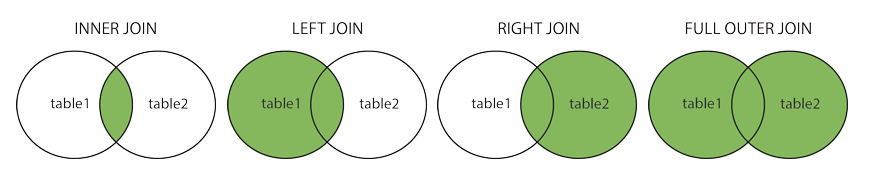



## Junção Interna (*Inner Join*)
**Exemplo** - Vamos exemplificar o resultado de uma **junção interna (inner join)** com o pandas usando pequenas tabelas.

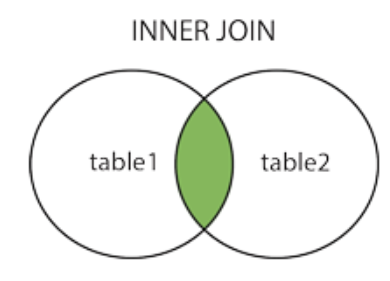

- Criamos uma **tabela de vendas** cuja a chave primária é o id_pedido e a chave estrangeira é o id_cliente.

In [ ]:
import pandas as pd
from datetime import datetime

# Criamos a tabela de vendas
dados = [{'id_pedido': 234, 'id_cliente': 18, 'data_venda': datetime(2019,1,1), 'id_loja': 5 },
         {'id_pedido': 235, 'id_cliente': 18, 'data_venda': datetime(2019,2,1), 'id_loja': 6 },
         {'id_pedido': 224, 'id_cliente': 34, 'data_venda': datetime(2019,1,10), 'id_loja': 7 },
         {'id_pedido': 311, 'id_cliente': 67, 'data_venda': datetime(2019,2,20), 'id_loja': 6 },
         {'id_pedido': 157, 'id_cliente': 78, 'data_venda': datetime(2019,3,5), 'id_loja': 5 },
         {'id_pedido': 142, 'id_cliente': 99, 'data_venda': datetime(2019,4,1), 'id_loja': 7 },
         {'id_pedido': 187, 'id_cliente': 19, 'data_venda': datetime(2019,3,1), 'id_loja': 6 }
         ]


df_vendas = pd.DataFrame(dados) 
print(df_vendas.dtypes)
df_vendas


- Criamos uma **tabela de clientes** onde a chave primária é o id_cliente.

In [ ]:
# Criamos a tabela de clientes
dados = [{'id_cliente': 18, 'nome': 'João Silva', 'cidade': 'João Pessoa' },
         {'id_cliente': 34, 'nome': 'Maria Silva', 'cidade': 'Rio de Janeiro' },
         {'id_cliente': 67, 'nome': 'Pedro Costa', 'cidade': 'Recife' },
         {'id_cliente': 78, 'nome': 'Mariana Rosa', 'cidade': 'Recife' },
         {'id_cliente': 99, 'nome': 'Joana Sousa', 'cidade': 'São Paulo' },
         {'id_cliente': 56, 'nome': 'José Alves', 'cidade': 'João Pessoa' }
         ]


df_clientes = pd.DataFrame(dados) 
print(df_clientes.dtypes)
df_clientes

- Faremos uma **junção interna (inner join)** com o pandas. Queremos que a tabela de vendas herde os artributos dois clientes que constam na tabela de clientes.

- Observe o resultado da junção:
  - O cliente 19 da tabela de vendas não consta na tabela de clientes, portanto, essa linha não sobrevive na tabela de junção.
  - O cliente 56 da tabela de clientes não se acha na tabela de vendas, portanto, essa linha não sobrevive na tabela de junção.

In [ ]:
pd.merge(left=df_vendas, right=df_clientes, on='id_cliente', how='inner')

## Junção à Esquerda (Left Join)

**Exemplo** - Vamos exemplificar o resultado de uma **junção à esquerda (left join)** com o pandas usando pequenas tabelas. 

- Faremos uma **junção à esquerda (left join)** com o pandas. Queremos que a **tabela de vendas (tabela à esquerda)** herde os artributos dois clientes que constam na **tabela de clientes (tabela à direita)**. Contudo, queremos que todas as linhas da tabela à esquerda sejam preservadas.


In [ ]:
pd.merge(left=df_vendas, right=df_clientes, on='id_cliente', how='left')


- Observe o resultado da junção:
  - O cliente 19 da tabela de vendas não consta na tabela de clientes. No entanto, no *left join* todas as linhas da tabela à esquerda são preservadas na tabela de junção.
  - O cliente 56 da tabela de clientes não se acha na tabela de vendas, portanto, essa linha não sobrevive na tabela de junção.

## Junção à Direita (Right Join)

**Exemplo** - Vamos exemplificar o resultado de uma **junção à direita (right join)** com o pandas usando pequenas tabelas. 

- Faremos uma **junção à direita (right join)** com o pandas. Queremos que a **tabela de vendas (tabela à esquerda)** herde os artributos dois clientes que constam na **tabela de clientes (tabela à direita)**. Contudo, queremos que todas as linhas da tabela à direita sejam preservadas.

In [ ]:
pd.merge(left=df_vendas, right=df_clientes, on='id_cliente', how='right')

- Observe o resultado da junção:
  - O cliente 19 da tabela de vendas não consta na tabela de clientes, portanto, essa linha não sobrevive na tabela de junção.
  - O cliente 56 da tabela de clientes não se acha na tabela de vendas. No entanto, no *right join* todas as linhas da tabela à direira são preservadas na tabela de junção.

## Junção Completa (Full Outer Join)

**Exemplo** - Vamos exemplificar o resultado de uma **junção completa (full outer join)** com o pandas usando pequenas tabelas. 

- Faremos uma **junção completa (outer join)** com o pandas. Queremos que a **tabela de vendas (tabela à esquerda)** herde os artributos dois clientes que constam na **tabela de clientes (tabela à direita)**. Contudo, queremos que todas as linhas da tabela à direita e todas as linhas da tabela à esquerda sejam preservadas.

In [ ]:
pd.merge(left=df_vendas, right=df_clientes, on='id_cliente', how='outer')

- Observe o resultado da junção:
  - O cliente 19 da tabela de vendas não consta na tabela de clientes, porém, essa linha sobreviveu na tabela de junção.
  - O cliente 56 da tabela de clientes não se acha na tabela de vendas, porém, essa linha sobreviveu na tabela de junção.

## Junção quando chaves tem nomes distintos


In [ ]:
# Vamos alterar o nome da chave estrangeira da tabela de vendas para cod_cliente
df_vendas.rename(columns={'id_cliente': 'cod_cliente'}, inplace=True)
df_vendas

In [ ]:
# Tabela de clientes tem chave primária id_clientes
df_clientes

- **Exemplo**: Efetuar a junção interna especificando os nomes das chaves nas tabelas à esquerda e à direita.

In [ ]:
pd.merge(left=df_vendas, right=df_clientes, how='inner', left_on='cod_cliente', right_on='id_cliente')

## Junção com múltiplas chaves

- Vamos exemplificar criando duas tabelas:
  - Tabela de vendas de lojas por ano
  - Tabela de funcionários de lojas por ano

- As chaves que identificam para informação única são:
  - id_loja e ano

In [ ]:
df_vendas = pd.DataFrame({'id_loja':[1,1,2,2],'ano':[2000, 2002, 2001, 2000], 
                          'vendas':[200, 345, 432, 543]})

df_vendas

In [ ]:
df_funcionarios = pd.DataFrame({'id_loja':[1,1,2,2,1], 'ano':[2000, 2003, 2001, 2000, 2002],
                  'funcionarios':[14, 34, 45, 13, 33]})
df_funcionarios

**Exemplo** - Efetuar a junção interna com múltiplas chaves.

In [ ]:
pd.merge(left=df_vendas, right=df_funcionarios, on=['ano','id_loja'], how='inner')

# Empilhamento e concatenação de conjunto de dados

- Concatenação em linhas ou em colunas de dados

- No pandas, usamos os métodos `.concat` (mais geral: linhas e colunas) e `.append` (mais específica para empilhamento de linhas)



## Adicionando linhas ao data frame (empilhamento)

- Para exemplificar, vamos criar 3 data frames 

In [ ]:
# Criando data frame com dicionários
df1 = pd.DataFrame({'id_cliente':range(0,5), 'total_pedidos':range(5,10), 
                    'ano': [2000, 2000,2000,2000,2000]})
df1

In [ ]:
df2 = pd.DataFrame({'total_pedidos':range(10,15), 'id_cliente':range(15,20), 'ano': [2001, 2001,2001,2001,2001]})
df2

In [ ]:
df3 = pd.DataFrame({'total_pedidos':[222], 'id_cliente':[111], 'ano': [2002]})
df3

**Exemplo** - Vamos empilhar dois data frames usando o método `.append`. Por padrão, esse método vai preservar os indexadores das linhas.

```
import pandas as pd
help(pd.append)
```

In [ ]:
# Empilhando e preservando a indexação.
df1.append(df2)

**Exemplo** - Vamos empilhar dois data frames usando o método `.append` e re-indexar todas as linhas.

In [ ]:
# Empilhando e re-indexando as linhas.
df1.append(df2, ignore_index=True)

**Exemplo** - Vamos empilhar todos os data frames usando o método `.append` e
re-indexar todas as linhas.

In [ ]:
df1.append([df2, df3], ignore_index=True)

## Empilhamento com colunas distintas

In [ ]:
df1['id_loja'] = [2,3,4,5,9]
df1

In [ ]:
df2

In [ ]:
df1.append(df2, ignore_index=True)

**Exemplo** - Vamos empilhar todos os data frames usando o método `.concat` e
re-indexar todas as linhas.

In [ ]:
pd.concat([df1, df2, df3], ignore_index=True)

## Adicionando colunas ao data frame (concatenação)

- Por padrão, o método `.concat` tem o `axis=0` (linhas).
- Para alterar a orientação do empilhamento, vamos alterar `axis=1`.
- Para exemplificar, vamos usar os 3 data frames já criados.

O pandas usará os **indexadores das linhas** para fazer a concatenação (empilhamento) por colunas.

In [ ]:
pd.concat([df1, df2, df3], axis=1)

In [ ]:
pd.concat([df1, df2, df3], axis=1)

**Exemplo** - Vamos empilhar as colunas dos data frames usando o método `.concat` e preservar apenas as junções de indexadores de linhas em comum.

In [ ]:
pd.concat([df1, df2, df3], axis=1, join='inner')

# Re-arranjar data frame (Reshape)

- Dados em planilhas podem ser arranjados em dois formatos:

- Formato amplo **wide** - **algumas dimensões são empilhandas nas colunas**.

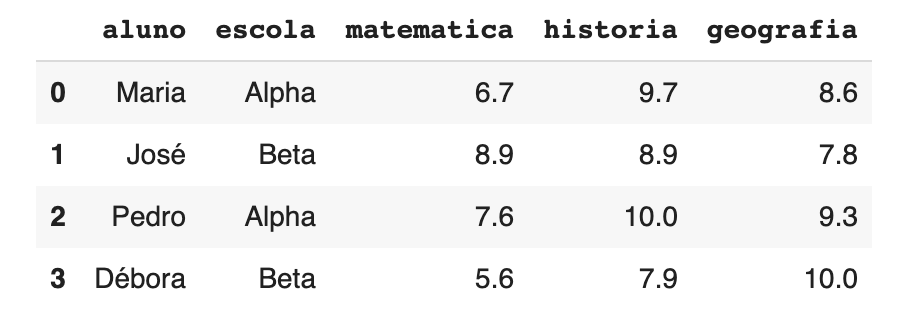

- Formato longo **long** - **todas as dimensões são empilhandas nas linhas**.

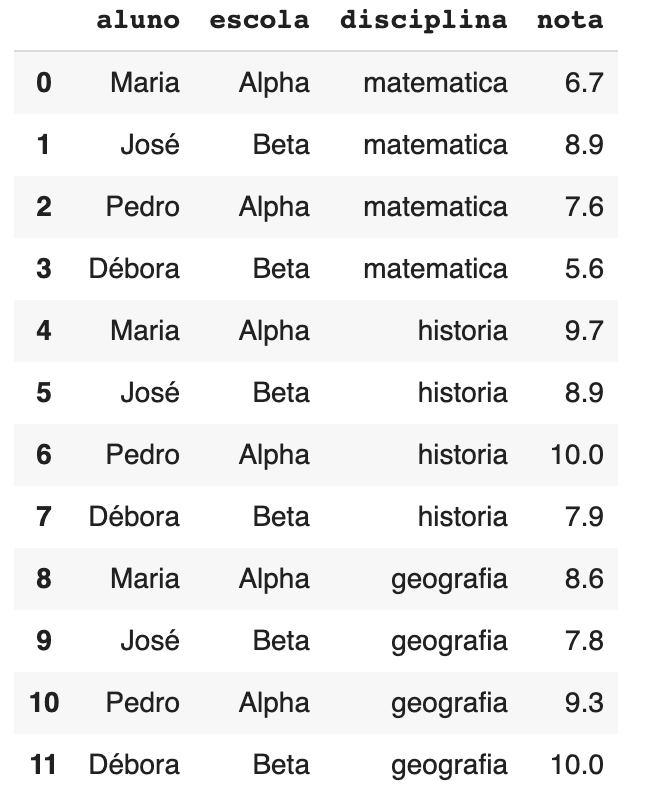


- Podemos usar alguns métodos para re-arranjar o modelo da planilha de dados.

- Transformando *long* para *wide*:

  - `.pivot`, `.pivot_table`

- Transformando de *wide* para *long*
  
  - `.melt`, `.wide_to_long`.

## Reshape - Formato long para wide

- O método `.pivot` permite transformar uma planilha na forma *long* (dados empilhados) para a forma ampla *wide*.

```
import pandas as pd
help(pd.pivot)
```
 - Argumentos importantes do método `.pivot`:
  - `index` - indexador da coluna cujos valores únicos deverão ser distribuídos
     nas linhas da planilha (dimensão linha).
  - `columns` - indexador da coluna cujos valores únicos deverão ser  distribuídos nas colunas da planilha (dimensão coluna).
  - `values` -  indexador da coluna cujos valores serão distribuídos nas linhas e colunas.

**Exemplo** - Vamos criar uma tabela de vendas no formato de dados em painel (*long/stacked*). Ou seja, as **dimensões são empilhadas nas linhas** da planilha.

In [ ]:
import pandas as pd

df_vendas = pd.DataFrame({'id_loja':[100,100,200,200,100], 
                          'data':['2000-11-02', '2000-10-12', '2001-03-05', '2001-04-30','2001-05-15'],
                          'vendas':[140, 334, 435, 153, 533]})

# Converter coluna data de string para datetime
df_vendas['data'] = pd.to_datetime(df_vendas['data'], format='%Y-%m-%d')

print(df_vendas.info())
df_vendas

**Exemplo** - Vamos usar o método `.pivot` para re-arranjar as dimensões e fatos. Passaremos a dimensão `data` para as colunas e manteremos a dimensão `loja` nas linhas. A variável de fato é `vendas`. Seus valores serão distribuídos por ambas as dimensões.

- Para tanto, informamos o `index` para a dimensão distribuída em linhas, `columns` para a dimensão distribuída nas colunas e `values` para os valores que serão arranjados.

In [ ]:
df_vendas.pivot(index='id_loja', columns='data', values='vendas')

In [ ]:
df_vendas.pivot(index='data', columns='id_loja', values='vendas')

## O método `.reset_index()`

- Quando fazemos transformações em um data frame o pandas normalmente preserva a indexação original de linhas e colunas. Contudo, em muitos casos se faz necessário limpar e re-indexar colunas e linhas.

- Para tanto, usamos o método `.reset_index()`:

```
import pandas as pd
pd.reset_index()
```

In [ ]:
# Pivotagem com re-indexação de colunas.
df_vendas.pivot(index='id_loja', columns='data', values='vendas').reset_index()

## Reshape - formato amplo *wide* para formato longo *long*

- Quando temos uma planilha cujas dimensões são distribuídas em linhas e colunas (*wide*) e desejamos transformá-la no formato *long*, ou seja, 
empilhar todas as dimensões nas linhas o método mais indicado no pandas é
o `.melt`.

```
import pandas as pd
help(pd.melt)
```

- No método `.melt` devemos informar algums argumentos importantes:
  - `id_vars` - lista de indexadores da(s) variável(is) que será (ão) distribuídas nas linhas da planilha. Normalmente, informamos os indexadores
  de todas as dimensões aqui.
  - `var_name` - nome que será atribuído a coluna que empilhará as dimensões da [planilha original wide/coluna.
  - `value_name` - nome que será atribuído a coluna de variável de fato, que será distribuída ao longo de todas as dimensões empilhadas nas linhas.

**Exemplo** - Vamos usar o método `.melt` para re-arranjar de wide/record para long/stacked.

Para tanto, informamos o index para a dimensão distribuída em linhas e para a dimensão distribuída nas colunas. Values corresponde aos valores que serão arranjados.

**Exemplo** - vamos criar um data frame em formato amplo (wide) e usar o método `.melt` para re-arranjá-lo para o formato longo (long).

In [ ]:
df_wide = pd.DataFrame(
    {
      "aluno": ["Maria", "José", "Pedro", "Débora"], 
      "escola": ["Alpha", "Beta", "Alpha", "Beta"],
      "matematica": [6.7,8.9, 7.6, 5.6],
      "historia": [9.7, 8.9, 10, 7.9],
      "geografia": [8.6, 7.8, 9.3, 10],
    }
)
df_wide

**Exemplo** - as dimensões "aluno", "escola" serão empilhadas nas linhas. As demais colunas serão convertidas em um única coluna (nova dimensão no espaço-linha) e receberá o nome "disciplina". A variável de fato será distribuída nas linhas e receberá o nome de "nota".





In [ ]:
pd.melt(df_wide, id_vars=["aluno", "escola"])

In [ ]:
pd.melt(df_wide, id_vars=["aluno", "escola"], var_name="disciplina", value_name="nota" )

**Exemplo** - a dimensão "aluno" será empilhada nas linhas. Selecionamos algumas colunas que serão convertidas em um única coluna (nova dimensão no espaço-linha) e receberá o nome "disciplina". A variável de fato será distribuída nas linhas e receberá o nome de "nota".

In [ ]:
df_wide

In [ ]:
pd.melt(df_wide, id_vars=["aluno"], value_vars=["matematica", "geografia"], 
        var_name="disciplina", value_name="nota" )

## Reshape - formato amplo *wide* para formato longo *long* usando indexador comum de colunas

- Suponha que tenhamos uma planilha cujas dimensões são distribuídas em linhas e colunas (*wide*) e desejamos transformá-la no formato *long*, ou seja, 
empilhar todas as dimensões nas linhas.

- No entanto, algumas dessas colunas representam uma dimensão distribuída e indexada com algum termo em comum. Nesse caso, é indicado usar o método `.wide_to_long`

```
import pandas as pd
help(pd.wide_to_long)
```

- No método `.wide_to_long` devemos informar algums argumentos importantes:
  - `stubnames` - termos comuns de indexação de colunas na planilha wide.Essas colunas serão converitdas em única coluna e seus valores distribuídos nas linhas da nova planilha. 
  - `i` - indexador da coluna da planilha wide que será preservada nas linhas.
  - `j` - nome que será atribuído a nova coluna de dimensão, que será *distribuída* nas linhas.

In [ ]:
df_wide = pd.DataFrame(
    {
      "municipio": ["A", "B", "C", "D"],
      "A2018": [2,3,4,6],
      "A2019": [2,5,6,8],
      "A2020": [4,7,9,8],

     }
)
df_wide

In [ ]:
pd.wide_to_long(df_wide, stubnames="A", i="municipio", j="ano")

**Exemplo** - vamos ler uma tabela de dados baixada do site www.ipeadata.gov.br. Tais dados resumem a população total residente por estados brasileiros e distrito federal. Os dados estão arranjados no formato **wide** onde a **dimensão ano é distribuída nas colunas**.



In [ ]:
import os
import pandas as pd

# Qual é atual diretório de trabalho?
os.getcwd()

# Definir diretório de trabalho para a pasta compartilhada
os.chdir('/content/drive/Shared drives/DS-PY/')

# Vamos ler a tabela 
df_populacao = pd.read_csv('populacao_br.csv', sep=";", skiprows=1)

print(df_populacao.info())
df_populacao


- Vamos remover a coluna indesejada.

In [ ]:
df_populacao.drop(columns=df_populacao.columns[8], inplace=True)
df_populacao

**Método `.melt`** - Vamos manter as dimensões "Sigla", "Estado", "Código" distribuídas nas linhas. As demais colunas (anos) serão convertidas em uma única coluna de dimensão que receberá o nome "ano". A variável de fato (população) será distribuída nas linhas.

In [ ]:
pd.melt(df_populacao, id_vars=["Sigla", "Estado", "Código"], var_name="ano", value_name="populacao" )

**Método `.wide_to_long`** - Para usar este método precisamos ter um nome em comum na indexação das colunas de dimensões. Para tanto, vamos renomer as colunas de dimensão ano com o pré-fixo "Populacao".

In [ ]:
df_populacao

In [ ]:
df_populacao.rename(
    columns={"1991": "Populacao1991", "1996": "Populacao1996", 
             "2000": "Populacao2000", "2007": "Populacao2007", 
             "2010": "Populacao2010"}, inplace=True)
df_populacao

**Método `.wide_to_long`** - Vamos manter as dimensões "Sigla", "Estado", "Código" distribuídas nas linhas (argumento *i*). As colunas com pré-fixo (Populacao) serão convertidas em uma única coluna de dimensão que receberá o nome "Ano". A variável de fato (população) será distribuída nas linhas. Por fim, re-indexamos as colunas com o método `.reset_index()`

In [ ]:
pd.wide_to_long(df_populacao, stubnames="Populacao", i=["Estado", "Sigla", "Código"], j="Ano").reset_index()

# Sumarização estatística

## Séries Pandas

- Podemos calcular estatísticas descritivas de cada coluna do pandas data frame. Cada coluna selecionada será um objeto `Pandas Series`.

- Vejamos os exemplos abaixo:

In [ ]:
df = pd.DataFrame(
    {
      "aluno": ["Maria", "José", "Pedro", "Débora"], 
      "escola": ["Alpha", "Beta", "Alpha", "Beta"],
      "matematica": [6.7,8.9, 7.6, 5.6],
      "historia": [9.7, 8.9, 10, 7.9],
      "geografia": [8.6, 7.8, 9.3, 10],
    }
)
df = pd.melt(df, id_vars=["aluno", "escola"], var_name="disciplina", value_name="nota" )
df

### Métodos para estatísticas descritivas

|Function|Description|
|-----| -----|
|count()	|Number of non-null observations
|sum()	|Sum of values
|mean()	|Mean of Values
|median()	|Median of Values
|mode()	|Mode of values
|std()	|Standard Deviation of the Values
|min()	|Minimum Value
|max()	|Maximum Value
|abs()	|Absolute Value
|prod()	|Product of Values
|cumsum()|	Cumulative Sum
|cumprod()	|Cumulative Product
|quantile() | Quantile/percentile

In [ ]:
print(type(df["nota"]))
print(df["nota"])

**Exemplo** - Estatísticas descritivas da coluna **nota**

In [ ]:
print('count:', df['nota'].count())
print('sum:', df['nota'].sum())
print('mean:', df['nota'].mean()) 
print('std:', df['nota'].std())
print('min:', df['nota'].min())
print('25%:', df['nota'].quantile(q=0.25))
print('50%:', df['nota'].quantile(q=0.50))
print('median:', df['nota'].median())
print('75%:', df['nota'].quantile(q=0.75))
print('max:', df['nota'].max())


**Exemplo** - Estatísticas descritivas da coluna **nota**. Agora, usando o método `.describe()`

In [ ]:
df['nota'].describe()

In [ ]:
print(df.info())
df["aluno"].describe()

**Exemplo** - Estatísticas descritivas para todas as colunas do data frame.

In [ ]:
df.count()

In [ ]:
df.mean()

In [ ]:
df.describe()

**Exemplo** - Estatísticas descritivas da coluna **populacao**. Dados da população residente por estado.

In [ ]:
df_populacao = pd.wide_to_long(df_populacao, stubnames=["Populacao"], i=["Estado", "Sigla", "Código"], j="Ano").reset_index()
df_populacao

In [ ]:
df_populacao.info()

In [ ]:
df_populacao.describe()

**Exemplo** - Filtramos a planilha para o ano de 2010 e somamos a população do Brasil neste ano.

In [ ]:
df_populacao.query("Ano == 2010")["Populacao"].sum()

**Exemplo** - Filtramos a planilha para o ano de 2010 e estado PB e somamos a população neste ano.

In [ ]:
df_populacao.query("Ano == 2010 and Código == 25")["Populacao"].sum()

# Tabulação de frequência 

**Exemplo** - Importar arquivo de dados da Pesquisa Nacional por Amostra de Domicílio (Anual) de 2014 (Paraíba) - IBGE usando informações sobre a posição incial de 
cada coluna e a posição final.

- No Python, a indexação de cada coluna começa com o índice 0. 
- O arquivo de dicionário do IBGE não informa a posição final. Portanto, usaremos posição final =  posição inicial + tamanho da coluna.
- Precisaremos criar uma função anômica para ajustar a indexação das colunas.

Dicionário de dados: https://docs.google.com/spreadsheets/d/1JNwSr7E7vGrzZv6mQQ0d_-dbPPS9yEl7

In [ ]:
# Qual é atual diretório de trabalho?
import pandas as pd
import os
os.getcwd()

# Definir diretório de trabalho para a pasta compartilhada
os.chdir('/content/drive/Shared drives/DS-PY/')

# Listando todos os arquivos
os.listdir()

# Criamos uma lista de tuplas com (inicio, tamanho) comforme 
# o arquivo do IBGE e as colunas que desejamos importar
inicio_tamanho = [(1,4), (5,2), (18,1), (27,3), (33,1), (768, 5)]

# Criamos uma lista de nomes para os campos importados
nomes = ['ano', 'uf', 'sexo', 'idade', 'cor', 'peso_amostral']

# Criamos uma função anônima para converter nossa lista
# para (inicio, final) conforme indexação do python (begin = inicio-1, end=begin+size)
inicio_final = lambda lista: [ (s[0] - 1, s[0] - 1 + s[1] ) for s in lista ]

# Aplicamos a conversão de parâmetros para leitura do pandas
posicao = inicio_final(inicio_tamanho)


# Leitura do arquivo de dados passando as posições e nomes
df = pd.read_fwf('pnad_anual_2014/PES2014.txt',
                 colspecs = posicao,
                 names = nomes)
df

- Vamos substituir valores para as variáveis *sexo* e *cor* especificando suas categorias. 

Sexo:

2	- Masculino
4	- Feminino

Cor: 

2	- Branca
4	- Preta
6	- Amarela
8	- Parda
0	- Indígena
9	- Sem declaração



In [ ]:
df.replace({'sexo': {2: 'Masculino', 4: 'Feminino'}, 
            'cor': {2: 'Branca', 4: 'Preta', 6: 'Amarela', 8: 'Parda', 0: 'Indígena', 9: 'Não declarou' } 
            }, inplace=True)
df

- Valores únicos para dimensões

In [ ]:
df['sexo'].unique()

In [ ]:
df['cor'].unique()

**Exemplo** - Contagem de frequência da amostra de 25% da população da Paraíba - homens/mulheres.




In [ ]:
df['sexo'].value_counts()

**Exemplo** - Criando um data frame com a contagem de frequência da amostra de 
25% da população da Paraíba - homens/mulheres.

In [ ]:
tbl = pd.DataFrame(  df['sexo'].value_counts()    )
tbl

**Exemplo** - Criando um data frame com a contagem de frequência da amostra de 
25% da população da Paraíba - homens/mulheres. Resetar indexadores e renomear colunas

In [ ]:
tbl.reset_index()

In [ ]:
tbl.reset_index().rename(columns={'index': 'sexo', 'sexo': 'total'})

**Exemplo** - Contagem de frequência relativa da amostra de 25% da população da Paraíba - cor.

In [ ]:
df['cor'].value_counts()

In [ ]:
df['cor'].value_counts() / len(df)*100

In [ ]:
dados = {
    'total': df['cor'].value_counts(), 
    'perc': df['cor'].value_counts()/len(df)*100
         }
tbl = pd.DataFrame( dados )
tbl

In [ ]:
tbl.reset_index()

In [ ]:

tbl = pd.DataFrame( dados ).reset_index().rename(columns={'index': 'cor', 'perc': 'percentual'})
tbl

In [ ]:
dados = {'total': df['sexo'].value_counts(), 
          'perc': df['sexo'].value_counts()/len(df)*100}
tbl = pd.DataFrame( dados ).reset_index().rename(columns={'index': 'sexo', 'perc': 'percentual'})
tbl

## Tabulação

- O método `.crosstab` possibilita fazer tabulações de frequências para valores únicos de dimensões.

```
import pandas as pd
help(pd.crosstab)
```

**Exemplo** - Contagem de indivíduos da amostra por sexo.


In [ ]:
import pandas as pd

tab = pd.crosstab(index=df["sexo"], columns="frequencia")

print(tab.columns)
print(type(tab))
tab

**Exemplo** - Contagem de indivíduos da amostra por sexo e total.

In [ ]:
pd.crosstab(index=df["sexo"], columns="frequencia", margins=True, margins_name="Total")

**Exemplo** - Contagem de indivíduos da população por sexo usando a soma do 
peso da amostra.


In [ ]:
pd.crosstab(index=df["sexo"], values=df.peso_amostral, columns="frequencia", 
            aggfunc="sum", margins=True, margins_name="Total")

**Exemplo** - Contagem de indivíduos da população por sexo e total. Re-indexando colunas e linhas.

In [ ]:
pd.crosstab(index=df["sexo"], values=df["peso_amostral"], columns="frequencia", 
            aggfunc="sum", margins=True, margins_name="Total").reset_index()

**Exemplo** - Média de idade por sexo para a amostra.



In [ ]:
pd.crosstab(index=df["sexo"], columns="media", values=df["idade"],
            aggfunc="mean", margins=True, margins_name="Total").reset_index()

**Exemplo** - Contagem de indivíduos da amostra por cor e total. Re-indexando colunas e linhas.




In [ ]:
pd.crosstab(index=df["cor"], columns="frequencia", margins=True, margins_name="Total").reset_index()

**Exemplo** - Contagem de indivíduos da população por cor e total. Re-indexando colunas e linhas.

In [ ]:
pd.crosstab(index=df["cor"], values=df["peso_amostral"], aggfunc="sum",
            columns="frequencia", margins=True, margins_name="Total").reset_index()

**Exemplo** - Contagem de indivíduos da população por cor e total. Re-indexando colunas e linhas. Adicionando coluna de frequência relativa.

In [ ]:
# Fazemos a contagem da freqência absoluta
tbl = pd.crosstab(index=df["cor"], values=df["peso_amostral"], aggfunc="sum", 
                  columns="frequencia").reset_index()
tbl

In [ ]:
# Adicionamos a coluna de percentual a partir da frequência                  
tbl['percentual'] = tbl["frequencia"] / sum(tbl["frequencia"])*100
tbl

In [ ]:
# Criamos um novo data frame com os totais por coluna
dados = [{'cor': 'Total', 'frequencia': tbl['frequencia'].sum(), 
          'percentual': tbl['percentual'].sum()}  ]
total = pd.DataFrame(dados)
total

In [ ]:
# Fazemos o empilhamento do data frame
tbl = tbl.append(total)
tbl

In [ ]:
# Fazemos a contagem da freqência absoluta
tbl = pd.crosstab(index=df["cor"], values=df["peso_amostral"], aggfunc="sum", 
                  columns="frequencia").reset_index()

# Adicionamos a coluna de percentual a partir da frequência                  
tbl['percentual'] = tbl["frequencia"]/sum(tbl["frequencia"])*100

# Criamos um novo data frame com os totais por coluna
total = pd.DataFrame([{'cor': 'Total', 'frequencia': tbl['frequencia'].sum(), 
                       'percentual': tbl['percentual'].sum()}])

# Fazemos o empilhamento do data frame
tbl = tbl.append(total)

# Resultado
tbl

**Exemplo** - Média de idade da amostra de 
25% da população da Paraíba - homens/mulheres (inferência requer plano amostral). Resetar indexadores e renomear colunas

In [ ]:
pd.crosstab(index=df["sexo"], values=df["idade"], columns="media", 
            aggfunc="mean", margins=True, margins_name="Total").reset_index()

## Tabulação cruzada

- A tabulação cruzada permite obter contagens de distribuições bivariadas ou estimar probabilidades não paramétricas.

- No pandas, devemos passar a série pandas da dimensão coluna no campo `columns`
  do método `.crosstab`.

**Exemplo** - Contagem de indivíduos por sexo e cor.


In [ ]:
pd.crosstab(index=df["sexo"], columns=df["cor"])

**Exemplo** - Contagem de indivíduos por sexo e cor com totalização por colunas e linhas.


In [ ]:
pd.crosstab(index=df["cor"], columns=df["sexo"], margins=True, margins_name="Total").reset_index()

**Exemplo** - Contagem de indivíduos por sexo e cor com totalização por colunas e linhas. Adicionando peso da amostra para contabilização da população.

In [ ]:
pd.crosstab(index=df["cor"], columns=df["sexo"], margins=True, 
            margins_name="Total", values=df["peso_amostral"], aggfunc="sum").reset_index()

**Exemplo** - Contagem de indivíduos por sexo e cor com totalização por colunas e linhas. Adicionando peso da amostra para contabilização da população. Estimando frequências relativas condicionadas por sexo.

In [ ]:
# Somamos o peso da amostra por cor e sexo
tbl = pd.crosstab(index=df["cor"], columns=df["sexo"],  
             values=df["peso_amostral"], aggfunc="sum").reset_index()
tbl

In [ ]:
# Atualizamos as colunas de frequência para frequência relativa             
tbl["Feminino"] =  tbl["Feminino"]/tbl["Feminino"].sum()*100  
tbl["Masculino"] =  tbl["Masculino"]/tbl["Masculino"].sum()*100
tbl

In [ ]:
# Criamos um data frama com os totais por colunas
total = pd.DataFrame([{"cor": "Total", "Feminino":tbl["Feminino"].sum(), 
                       "Masculino": tbl["Masculino"].sum() }  ]) 
total

In [ ]:
# Fazemos o empilhamento
tbl = tbl.append(total)
tbl

In [ ]:
# Somamos o peso da amostra por cor e sexo
tbl = pd.crosstab(index=df["cor"], columns=df["sexo"],  
             values=df["peso_amostral"], aggfunc="sum").reset_index()

# Atualizamos as colunas de frequência para frequência relativa             
tbl["Feminino"] =  tbl["Feminino"]/tbl["Feminino"].sum()*100  
tbl["Masculino"] =  tbl["Masculino"]/tbl["Masculino"].sum()*100 

# Criamos um data frama com os totais por colunas
total = pd.DataFrame([{"cor": "Total", "Feminino":tbl["Feminino"].sum(), 
                       "Masculino": tbl["Masculino"].sum() }  ]) 

# Fazemos o empilhamento
tbl = tbl.append(total)

# Resultado
tbl    

**Exemplo** - Contagem de indivíduos por sexo e cor com totalização por colunas e linhas. Adicionando peso da amostra para contabilização da população. Estimando frequências relativas condicionadas por cor.

In [ ]:
# tabulação cruzada
tbl = pd.crosstab(index=df["cor"], columns=df["sexo"],  
             values=df["peso_amostral"], aggfunc="sum").reset_index()
tbl             

In [ ]:
# Criamos uma nova coluna com os totais por linha
tbl["Total"] =  tbl.sum(axis=1) 
tbl

In [ ]:
# Atualizamos as colunas de frequência para frequência relativa por linha           
tbl["Feminino"] =  tbl["Feminino"] / tbl["Total"]*100  
tbl["Masculino"] =  tbl["Masculino"] / tbl["Total"]*100 
tbl

In [ ]:
# Atualizamos a coluna de totais por linha
tbl["Total"] = 100 
tbl

In [ ]:
# tabulação cruzada
tbl = pd.crosstab(index=df["cor"], columns=df["sexo"],  
             values=df["peso_amostral"], aggfunc="sum").reset_index()

# Atualizamos as colunas de frequência para frequência relativa por linha  
tbl["Total"] =  tbl.sum(axis=1)           
tbl["Feminino"] =  tbl["Feminino"]/tbl["Total"]*100  
tbl["Masculino"] =  tbl["Masculino"]/tbl["Total"]*100 

# Atualizamos a coluna de totais por linha
tbl["Total"] = 100  

# Resultado
tbl   


**Exemplo** - Média de idade da amostra de 
25% da população da Paraíba - homens/mulheres  e cor (inferência requer plano amostral). Resetar indexadores e renomear colunas

In [ ]:
pd.crosstab(index=df["cor"], columns=df["sexo"], values=df["idade"], 
            aggfunc="mean", margins=True, margins_name="Total").reset_index()

# Sumarização de dados com Pivotagem 

- A pivotagem é um procedimento de "girar/segmentar" um planilha de dados a partir de dimensões (categorias) de modo a sumarizar dados de uma planilha com grande número de linhas.

- Uma **tabela pivô** é uma planilha que sumariza dados de outra planilha de maior número de linhas. 

- No pandas usaremos o método `.pivot_table` e precisaremos informa **ao menos um indexador de coluna** para efeutar a pivotagem.

- Por padrão, a **tabela pivô** deverá sumarizar variáveis numéricas (sem padrão de repetição) pela média aritmérica. 

- A pivotagem pode adicionar múltiplas dimensões nas linhas e/ou nas colunas da  **tabela pivô**.

- Vamos ler uma tabela de pipeline de vendas para os exemplos a seguir.

In [ ]:
import os
import pandas as pd
import numpy as np

# Mudando diretório de trabalho
os.chdir('/content/drive/Shared drives/DS-PY')

# Ler dados de vendas
df_vendas = pd.read_excel('sales.xlsx')

print(df_vendas.info())
df_vendas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Account   17 non-null     int64 
 1   Name      17 non-null     object
 2   Rep       17 non-null     object
 3   Manager   17 non-null     object
 4   Product   17 non-null     object
 5   Quantity  17 non-null     int64 
 6   Price     17 non-null     int64 
 7   Status    17 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.2+ KB
None


,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won
5,218895,Kulas Inc,Daniel Hilton,Debra Henley,CPU,2,40000,pending
6,218895,Kulas Inc,Daniel Hilton,Debra Henley,Software,1,10000,presented
7,412290,Jerde-Hilpert,John Smith,Debra Henley,Maintenance,2,5000,pending
8,740150,Barton LLC,John Smith,Debra Henley,CPU,1,35000,declined
9,141962,Herman LLC,Cedric Moss,Fred Anderson,CPU,2,65000,won


Algumas **questões de análise desses dados**:

- Qual é a receita potencial na pipeline (sequência) de vendas?
- Quais produtos estão na pipeline?
- Quem tem quais produtos e em qual estágio?
- Quais as chances de fechar negócios até o final do ano?

**Exemplo**:  Criar uma tabela pivô para sumarizar os dados por nome da loja (departamento).

- Ao passar o índice da coluna "Name" algumas variáveis númericas serão sumarizadas pela média aritmética (Preço e Quantidade)

In [ ]:
import pandas as pd
# Sumarizar preço e quantidade por departamento
pd.pivot_table(df_vendas,index=["Name"])

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


**Exemplo**:  Criar uma tabela pivô para sumarizar os dados por nome da loja (departamento), representante e gerente.


In [ ]:
pd.pivot_table(df_vendas,index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


**Exemplo**:  Criar uma tabela pivô para sumarizar os dados por representante e gerente.

In [ ]:
pd.pivot_table(df_vendas,index=[ "Rep", "Manager"])

,,Account,Price,Quantity
Rep,Manager,,,
Cedric Moss,Fred Anderson,196016.5,27500.000000,1.250000
Craig Booker,Debra Henley,720237.0,20000.000000,1.250000
Daniel Hilton,Debra Henley,194874.0,38333.333333,1.666667
John Smith,Debra Henley,576220.0,20000.000000,1.500000
Wendy Yule,Fred Anderson,614061.5,44250.000000,3.000000


**Exemplo**:  Criar uma tabela pivô para sumarizar apenas a coluna "Price" por representante e gerente.
- Para tanto, informamos o parâmetro "values" com o índice da coluna que desejamos sumarizar.

In [ ]:
pd.pivot_table(df_vendas,index=["Manager", "Rep"], values=["Price"])

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

**Exemplo**:  Criar uma tabela pivô para sumarizar apenas a coluna "Quantidade" por representante e gerente.
- No entanto, vamos somar as quantidades passando o argumento `aggfunc` com um método matemático do pacote `numpy`.

In [ ]:
pd.pivot_table(df_vendas,index=["Rep"], 
               values=["Quantity"], aggfunc="sum")

,Quantity
Rep,
Cedric Moss,5
Craig Booker,5
Daniel Hilton,5
John Smith,3
Wendy Yule,12


**Exemplo**:  Criar uma tabela pivô para sumarizar apenas a coluna "Quantidade" por representante e gerente.
- No entanto, vamos sumarizar a média e soma das quantidades passando o argumento `aggfunc` com métodos matemáticos do pacote `numpy`.

In [ ]:
pd.pivot_table(df_vendas,index=["Manager", "Rep"],
               values=["Quantity"], aggfunc=["sum", "mean"])

sum      mean
                            Quantity  Quantity
Manager       Rep                             
Debra Henley  Craig Booker         5  1.250000
              Daniel Hilton        5  1.666667
              John Smith           3  1.500000
Fred Anderson Cedric Moss          5  1.250000
              Wendy Yule          12  3.000000

**Exemplo**:  Criar uma tabela pivô para sumarizar apenas a coluna de vendas por representante e gerente.

- No entanto, vamos sumarizar a média e soma das quantidades passando o argumento `aggfunc` com métodos matemáticos do pacote `numpy`.

In [ ]:
df_vendas["Value"] = df_vendas["Quantity"]*df_vendas["Price"]

pd.pivot_table(df_vendas,index=["Manager", "Rep"],
               values=["Value"], aggfunc=["sum", "mean"])

sum           mean
                              Value          Value
Manager       Rep                                 
Debra Henley  Craig Booker    85000   21250.000000
              Daniel Hilton  220000   73333.333333
              John Smith      45000   22500.000000
Fred Anderson Cedric Moss    175000   43750.000000
              Wendy Yule     661000  165250.000000

- **Entenda** - observe que temos duas dimensões hierárquicas nas linhas da **tabela pivô**: (gerente e seus representates de vendas). As colunas estão sumarizando a variável quantidade vendida (soma e média).

## Pivotagem com dimensões cruzadas (cubos dimensionais)

- Vamos criar tabelas pivô que sumarizem dados a partir de múltiplas dimensões arranjas nas linhas e nas colunas.

**Exemplo** - Vamos analisar a média de preços dos produtos na pipeline de vendas pelas dimensões gerente e representante (linhas) e dimensão produto (colunas).

In [ ]:
pd.pivot_table(df_vendas,index=["Manager","Rep"],
               columns=["Product"],
               values=["Price"])

Price                             
Product                          CPU Maintenance Monitor Software
Manager       Rep                                                
Debra Henley  Craig Booker   32500.0      5000.0     NaN  10000.0
              Daniel Hilton  52500.0         NaN     NaN  10000.0
              John Smith     35000.0      5000.0     NaN      NaN
Fred Anderson Cedric Moss    47500.0      5000.0     NaN  10000.0
              Wendy Yule     82500.0      7000.0  5000.0      NaN

**Exemplo** - Podemos imputar valor "zero" para NaN - valores que não foram calculados passando o argumento `fill_value`.

In [ ]:
pd.pivot_table(df_vendas,index=["Manager","Rep"],
               values=["Price"],
               columns=["Product"],
              fill_value=0)

Price                             
Product                        CPU Maintenance Monitor Software
Manager       Rep                                              
Debra Henley  Craig Booker   32500        5000       0    10000
              Daniel Hilton  52500           0       0    10000
              John Smith     35000        5000       0        0
Fred Anderson Cedric Moss    47500        5000       0    10000
              Wendy Yule     82500        7000    5000        0

**Exemplo** - Vamos analisar a média/soma de preços e quantidades dos produtos na pipeline de vendas pelas dimensões gerente, representante, produto (linhas).

In [ ]:
pd.pivot_table(df_vendas,index=["Manager","Rep", "Product"],
               values=["Price","Quantity"],
               aggfunc=["sum", "mean"],
               fill_value=0)

sum            mean         
                                          Price Quantity  Price Quantity
Manager       Rep           Product                                     
Debra Henley  Craig Booker  CPU           65000        2  32500      1.0
                            Maintenance    5000        2   5000      2.0
                            Software      10000        1  10000      1.0
              Daniel Hilton CPU          105000        4  52500      2.0
                            Software      10000        1  10000      1.0
              John Smith    CPU           35000        1  35000      1.0
                            Maintenance    5000        2   5000      2.0
Fred Anderson Cedric Moss   CPU           95000        3  47500      1.5
                            Maintenance    5000        1   5000      1.0
                            Software      10000        1  10000      1.0
              Wendy Yule    CPU          165000        7  82500      3.5
                            Maintenance    7000        3   7000      3.0
                            Monitor        5000        2   5000      2.0

**Exemplo** - Vamos analisar preços e quantidades dos produtos na pipeline de vendas pelas dimensões gerente, representante, produto (linhas). Agora, **Adicionando os totais** com o parâmetro `margins=True`.

In [ ]:
pd.pivot_table(df_vendas,index=["Manager","Rep","Product"],
               values=["Price","Quantity"] ,
               aggfunc={"Quantity":"sum","Price":"mean"},
               fill_value=0, margins=True)

Price  Quantity
Manager       Rep           Product                            
Debra Henley  Craig Booker  CPU          32500.000000         2
                            Maintenance   5000.000000         2
                            Software     10000.000000         1
              Daniel Hilton CPU          52500.000000         4
                            Software     10000.000000         1
              John Smith    CPU          35000.000000         1
                            Maintenance   5000.000000         2
Fred Anderson Cedric Moss   CPU          47500.000000         3
                            Maintenance   5000.000000         1
                            Software     10000.000000         1
              Wendy Yule    CPU          82500.000000         7
                            Maintenance   7000.000000         3
                            Monitor       5000.000000         2
All                                      30705.882353        30

**Exemplo** - Vamos analisar preços e quantidades dos produtos na pipeline de vendas pelas dimensões gerente e status de venda (linhas), produto (colunas). Agora, considerando o total de quantidades e média/soma de preços.

In [ ]:
pd.pivot_table(df_vendas,index=["Manager","Status"],
               columns=["Product"],
               values=["Quantity","Price"],
               aggfunc={"Quantity":["sum", "mean"],"Price":["mean"]},
               fill_value=0) 


Price                      ...    Quantity                 
                          mean                      ...         sum                 
Product                    CPU Maintenance Monitor  ... Maintenance Monitor Software
Manager       Status                                ...                             
Debra Henley  declined   35000           0       0  ...           0       0        0
              pending    40000        5000       0  ...           4       0        0
              presented  30000           0       0  ...           0       0        2
              won        65000           0       0  ...           0       0        0
Fred Anderson declined   65000           0       0  ...           0       0        0
              pending        0        5000       0  ...           1       0        0
              presented  30000           0    5000  ...           0       2        1
              won        82500        7000       0  ...           3       0        0

[8 rows x 12 columns]

**Exemplo** - estatística personalizada.

In [ ]:
import numpy as np

stat = lambda x: np.sum(x*2/x)

pd.pivot_table(df_vendas,index=["Manager","Status"],
               columns=["Product"],
               values=["Quantity"],
               aggfunc=stat,
               fill_value=0) 

Quantity                             
Product                      CPU Maintenance Monitor Software
Manager       Status                                         
Debra Henley  declined         4           0       0        0
              pending          2           4       0        0
              presented        2           0       0        4
              won              2           0       0        0
Fred Anderson declined         2           0       0        0
              pending          0           2       0        0
              presented        2           0       2        2
              won              4           2       0        0

## Pivotagem com filtros avançados

- Vamos armazenar nossa **tabela pivô** em uma variável e usar o método `.query` para efetuar filtragens.

In [ ]:
table = pd.pivot_table(df_vendas,index=["Manager","Status"],
                       columns=["Product"],values=["Quantity","Price"],
                       aggfunc={"Quantity":["sum", "mean"],"Price":"mean"},
                       fill_value=0) 
table

Price                      ...    Quantity                 
                          mean                      ...         sum                 
Product                    CPU Maintenance Monitor  ... Maintenance Monitor Software
Manager       Status                                ...                             
Debra Henley  declined   35000           0       0  ...           0       0        0
              pending    40000        5000       0  ...           4       0        0
              presented  30000           0       0  ...           0       0        2
              won        65000           0       0  ...           0       0        0
Fred Anderson declined   65000           0       0  ...           0       0        0
              pending        0        5000       0  ...           1       0        0
              presented  30000           0    5000  ...           0       2        1
              won        82500        7000       0  ...           3       0        0

[8 rows x 12 columns]

**Exemplo** - filtrando dados por gerente.

In [ ]:
table.query('Manager == "Debra Henley"')  

Price                      ...    Quantity                 
                         mean                      ...         sum                 
Product                   CPU Maintenance Monitor  ... Maintenance Monitor Software
Manager      Status                                ...                             
Debra Henley declined   35000           0       0  ...           0       0        0
             pending    40000        5000       0  ...           4       0        0
             presented  30000           0       0  ...           0       0        2
             won        65000           0       0  ...           0       0        0

[4 rows x 12 columns]

**Exemplo** - filtrando dados por negociações pendentes e fechadas.

In [ ]:
table.query('Status == ["pending","won"]')

Price                      ...    Quantity                 
                        mean                      ...         sum                 
Product                  CPU Maintenance Monitor  ... Maintenance Monitor Software
Manager       Status                              ...                             
Debra Henley  pending  40000        5000       0  ...           4       0        0
              won      65000           0       0  ...           0       0        0
Fred Anderson pending      0        5000       0  ...           1       0        0
              won      82500        7000       0  ...           3       0        0

[4 rows x 12 columns]

# Agrupamento e sumarização

- As operações de agregação de dados por agrupamento de dimensões permitem gerar
  novos cubos dimensionais que sumarizam dados de forma segmentada por dimensões.

- Para agrupar dados em dimensões usamos o método `.groupby`:

```
import pandas as pd
help(pd.groupby)
```

- Várias funções de agregação podem ser usadas no pandas conforme a tabela abaixo.


# Funções de agregação

|Function|Description|
|-----| -----|
mean()|Compute mean of groups
sum()|Compute sum of group values
size()|	Compute group sizes
count()|	Compute count of group
std()	|Standard deviation of groups
var()	|Compute variance of groups
sem()	|Standard error of the mean of groups
describe()|	Generates descriptive statistics
first()|	Compute first of group values
last()|	Compute last of group values
nth()|	Take nth value, or a subset if n is a list
min()|	Compute min of group values
max()|	Compute max of group values

**Exemplo** - Importar arquivo de **micro dados do Censo Demográfico de 2010** - IBGE usando informações sobre a posição incial de 
cada coluna e a posição final.

- https://www.ibge.gov.br/estatisticas/sociais/populacao/25089-censo-1991-6.html?=&t=o-que-e

- Dicionário de dados: https://docs.google.com/spreadsheets/d/1AMDHmgoVRZqpB6rGvL04MQtUUwCA-PIL

- Observe que no arquivo de dicionário  são informados os campos de posição inicial, posição final, digitos inteiros e dígitos decimais de cada coluna. 
- Para facilitar, criaremos uma função auxiliar que converterá as informações de posição inicial e tamanho para posição incial e posição final na forma do pandas.

In [ ]:
import os
import pandas as pd

# Mudando diretório de trabalho
os.chdir('/content/drive/Shared drives/DS-PY')

# Checar qual é o diretório de trabalho
os.getcwd()

# Lista de nomes
nomes = ['uf', 'peso_amostral', 'sexo', 'cor', 'idade', 'instrucao', 'renda_dom']

# Criamos uma lista de tuplas com (inicio, final) comforme 
# o arquivo do IBGE e as colunas que desejamos importar
inicio_final = [(1,2), (29,44), (58,58), (68,68), (62,64), (158, 158), (279, 285)]

# Criamos uma função anônima para converter nossa lista
# para (inicio, final) conforme indexação do python (begin = inicio-1, end=final)
conv_posicao = lambda lista: [ (s[0]-1,s[1]) for s in lista ]

# Vamos converter a coluna peso amostral para float
# e dividir por 10^13, onde 13 é total de dígitos decimais
# informados no dicionário de dados
conv_nomes = {
    'peso_amostral': lambda x: float(x)/10**13
    }

# Aplicamos a conversão de parâmetros para leitura do pandas
posicao = conv_posicao(inicio_final)

# Leitura do arquivo de dados passando as posições e nomes
df = pd.read_fwf('censo_demografico_2010/Amostra_Pessoas_25.txt',
                 colspecs = posicao,
                 names = nomes, 
                 converters=conv_nomes
                 )

# Resultado
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571631 entries, 0 to 571630
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   uf             571631 non-null  int64  
 1   peso_amostral  571631 non-null  float64
 2   sexo           571631 non-null  int64  
 3   cor            571631 non-null  int64  
 4   idade          571631 non-null  int64  
 5   instrucao      571631 non-null  int64  
 6   renda_dom      570911 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 30.5 MB
None


,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom
0,25,4.960883,1,1,34,1,612.0
1,25,4.960883,2,1,1,1,612.0
2,25,4.960883,2,1,5,1,612.0
3,25,4.960883,2,4,28,2,612.0
4,25,4.945709,1,4,13,1,2000.0
...,...,...,...,...,...,...,...
571626,25,2.520554,2,1,29,1,250.0
571627,25,2.520554,1,1,9,1,250.0
571628,25,2.520554,2,1,7,1,250.0
571629,25,1.889369,1,4,64,1,910.0


- Vamos substituir valores para as variáveis *sexo* e *cor* especificando suas categorias. 

Sexo:

1	- Masculino
2	- Feminino

Cor: 

1	- Branca
2	- Preta
3	- Amarela
4	- Parda
5	- Indígena
9	- Sem declaração

Instrução:
 
1- Sem instrução e fundamental incompleto 

2- Fundamental completo e médio incompleto 

3- Médio completo e superior incompleto 

4- Superior completo 

5- Não determinado 					

In [ ]:
df.replace( {'sexo': {1: 'Masculino', 2: 'Feminino'}, 
            'cor': {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Não declarou' },
            'instrucao': {1: 'Sem instrução e fundamental incompleto',
                          2: 'Fundamental completo e médio incompleto',
                          3: 'Médio completo e superior incompleto',
                          4: 'Superior completo',
                          5: 'Não informada'}
            }, inplace=True)
df

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom
0,25,4.960883,Masculino,Branca,34,Sem instrução e fundamental incompleto,612.0
1,25,4.960883,Feminino,Branca,1,Sem instrução e fundamental incompleto,612.0
2,25,4.960883,Feminino,Branca,5,Sem instrução e fundamental incompleto,612.0
3,25,4.960883,Feminino,Parda,28,Fundamental completo e médio incompleto,612.0
4,25,4.945709,Masculino,Parda,13,Sem instrução e fundamental incompleto,2000.0
...,...,...,...,...,...,...,...
571626,25,2.520554,Feminino,Branca,29,Sem instrução e fundamental incompleto,250.0
571627,25,2.520554,Masculino,Branca,9,Sem instrução e fundamental incompleto,250.0
571628,25,2.520554,Feminino,Branca,7,Sem instrução e fundamental incompleto,250.0
571629,25,1.889369,Masculino,Parda,64,Sem instrução e fundamental incompleto,910.0


**Exemplo** - Agrupando o data frame pela dimensão "sexo" e tomandos as médias das variáveis numéricas segundo os valores dessa dimensão.

In [ ]:
df.groupby("sexo").mean()

,uf,peso_amostral,idade,renda_dom
sexo,,,,
Feminino,25.0,6.664684,32.177218,1317.291021
Masculino,25.0,6.510477,30.370488,1293.958684


**Exemplo** - Agrupando o data frame pela dimensão "sexo" e tomandos as médias das variáveis numéricas segundo os valores dessa dimensão. Re-indexando linhas e colunas.

In [ ]:
df.groupby("sexo").mean().reset_index()

,sexo,uf,peso_amostral,idade,renda_dom
0,Feminino,25.0,6.664684,32.177218,1317.291021
1,Masculino,25.0,6.510477,30.370488,1293.958684


**Exemplo** - Selecionando colunas do data frame. Agrupando o data frame pela dimensão "sexo" e tomando a média de idade segundo os valores dessa dimensão. Re-indexando linhas e colunas.

In [ ]:
df[["sexo", "idade"]].groupby("sexo").mean().reset_index()

,sexo,idade
0,Feminino,32.177218
1,Masculino,30.370488


**Exemplo** - Selecionando colunas do data frame. Agrupando o data frame pela dimensão "cor" e tomando a média da renda domiciliar segundo os valores dessa dimensão. Re-indexando linhas e colunas.

In [ ]:
df[["cor", "renda_dom"]].groupby("cor").mean().reset_index()

,cor,renda_dom
0,Amarela,1229.313142
1,Branca,1605.257442
2,Indígena,919.856898
3,Não declarou,903.959184
4,Parda,1123.817644
5,Preta,1075.787211


**Exemplo** - Selecionando colunas do data frame. Agrupando o data frame pela dimensão "cor" e tomando a soma do peso amostral segundo os valores dessa dimensão (população total). Re-indexando linhas e colunas.

In [ ]:
df[["cor", "peso_amostral"]].groupby("cor").sum().reset_index()

,cor,peso_amostral
0,Amarela,4.663070e+04
1,Branca,1.494248e+06
2,Indígena,1.948982e+04
3,Não declarou,4.821924e+02
4,Parda,1.994319e+06
5,Preta,2.113585e+05


**Exemplo** - **Agrupando em múltiplas dimensões** - Selecionando colunas do data frame. Agrupando o data frame pelas dimensões "cor" e "sexo" e tomando a média da renda domiciliar segundo os valores dessa dimensão. Re-indexando linhas e colunas.

In [ ]:
df[["cor", "sexo", "renda_dom"]].groupby(["cor", "sexo"]).mean().reset_index()

,cor,sexo,renda_dom
0,Amarela,Feminino,1223.258643
1,Amarela,Masculino,1237.142662
2,Branca,Feminino,1627.461850
3,Branca,Masculino,1581.040379
4,Indígena,Feminino,903.342196
5,Indígena,Masculino,936.392872
6,Não declarou,Feminino,752.615385
7,Não declarou,Masculino,1075.043478
8,Parda,Feminino,1121.641748
9,Parda,Masculino,1126.033936


## Criando intervalos de classes

- O método `.cut` permite criar intervalos de classes a partir de uma variável numérica.

```
import pandas as pd
help(pd.cut)
```

**Exemplo** - Criando grupos de faixa etária a partir da variável idade em anos.

In [ ]:
print(f" Máximo: {df.idade.max()} ; Mínimo {df.idade.min()}")

 Máximo: 128 ; Mínimo 0


In [ ]:
list(range(0, 140, 10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

In [ ]:
# Entendendo o método .cut
# Criando intervalos de classe abertos à direita
pd.cut(df.idade, range(0, 140, 10), right=False)

0         [30, 40)
1          [0, 10)
2          [0, 10)
3         [20, 30)
4         [10, 20)
            ...   
571626    [20, 30)
571627     [0, 10)
571628     [0, 10)
571629    [60, 70)
571630    [20, 30)
Name: idade, Length: 571631, dtype: category
Categories (13, interval[int64]): [[0, 10) < [10, 20) < [20, 30) < [30, 40) ... [90, 100) <
                                   [100, 110) < [110, 120) < [120, 130)]

In [ ]:
list(range(0, 130, 10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]

In [ ]:
# Criando os rótulos dos valores da classe
# Intervalos de idade de 9 em 9 anos
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 130, 10)]
labels

['0 - 9',
 '10 - 19',
 '20 - 29',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 '80 - 89',
 '90 - 99',
 '100 - 109',
 '110 - 119',
 '120 - 129']

In [ ]:
# Criando a coluna faixa etária - segmentando em intervalo e aplicando rótulos
df['faixa_etaria'] = pd.cut(df.idade, range(0, 140, 10), right=False, labels=labels)
df

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
0,25,4.960883,Masculino,Branca,34,Sem instrução e fundamental incompleto,612.0,30 - 39
1,25,4.960883,Feminino,Branca,1,Sem instrução e fundamental incompleto,612.0,0 - 9
2,25,4.960883,Feminino,Branca,5,Sem instrução e fundamental incompleto,612.0,0 - 9
3,25,4.960883,Feminino,Parda,28,Fundamental completo e médio incompleto,612.0,20 - 29
4,25,4.945709,Masculino,Parda,13,Sem instrução e fundamental incompleto,2000.0,10 - 19
...,...,...,...,...,...,...,...,...
571626,25,2.520554,Feminino,Branca,29,Sem instrução e fundamental incompleto,250.0,20 - 29
571627,25,2.520554,Masculino,Branca,9,Sem instrução e fundamental incompleto,250.0,0 - 9
571628,25,2.520554,Feminino,Branca,7,Sem instrução e fundamental incompleto,250.0,0 - 9
571629,25,1.889369,Masculino,Parda,64,Sem instrução e fundamental incompleto,910.0,60 - 69


**Exemplo** - contando o total da população por faixa de etária. 

In [ ]:
df[["faixa_etaria", "peso_amostral"]].groupby(["faixa_etaria"]).sum().round(0).reset_index()

,faixa_etaria,peso_amostral
0,0 - 9,605296.0
1,10 - 19,701443.0
2,20 - 29,673476.0
3,30 - 39,558196.0
4,40 - 49,458265.0
5,50 - 59,318751.0
6,60 - 69,231140.0
7,70 - 79,141060.0
8,80 - 89,64515.0
9,90 - 99,13644.0


**Exemplo** - contando o total da população por faixa de etária e sexo. 




In [ ]:
df[["faixa_etaria", "sexo", "peso_amostral"]].groupby(["faixa_etaria", "sexo"]).sum().round(0).reset_index()

,faixa_etaria,sexo,peso_amostral
0,0 - 9,Feminino,297103.0
1,0 - 9,Masculino,308193.0
2,10 - 19,Feminino,346446.0
3,10 - 19,Masculino,354997.0
4,20 - 29,Feminino,341704.0
5,20 - 29,Masculino,331773.0
6,30 - 39,Feminino,288595.0
7,30 - 39,Masculino,269601.0
8,40 - 49,Feminino,240311.0
9,40 - 49,Masculino,217955.0


**Exemplo** - Média de idade da população por faxia de instrução. 

In [ ]:
df[["instrucao", "idade"]].groupby(["instrucao"]).mean().reset_index()

,instrucao,idade
0,Fundamental completo e médio incompleto,28.615080
1,Médio completo e superior incompleto,31.946996
2,Não informada,21.709510
3,Sem instrução e fundamental incompleto,31.157529
4,Superior completo,41.738604


**Exemplo** - Média de idade da população por faxia de instrução e sexo. 

In [ ]:
df[["instrucao", "idade", "sexo"]].groupby(["sexo","instrucao"]).mean().reset_index()

,sexo,instrucao,idade
0,Feminino,Fundamental completo e médio incompleto,28.744663
1,Feminino,Médio completo e superior incompleto,32.174945
2,Feminino,Não informada,22.157623
3,Feminino,Sem instrução e fundamental incompleto,32.247809
4,Feminino,Superior completo,41.579501
5,Masculino,Fundamental completo e médio incompleto,28.452159
6,Masculino,Médio completo e superior incompleto,31.620343
7,Masculino,Não informada,21.103147
8,Masculino,Sem instrução e fundamental incompleto,30.141173
9,Masculino,Superior completo,42.051972


## Agrupamento com múltiplas métricas

- O método `.agg` permite operar múltiplas funções de agregação no agrupamento.

```
import pandas as pd
help(pd.agg)
```

**Exemplo** - Tomando os valores de média, mínimo e máximo de todas as variáveis numéricas agrupadas pela dimensão "sexo".

In [ ]:
df.groupby(["sexo"]).agg(["mean", "min", "max"])

uf         peso_amostral       ... idade         renda_dom               
          mean min max          mean  min  ...   min  max         mean  min       max
sexo                                       ...                                       
Feminino    25  25  25      6.664684  1.0  ...     0  121  1317.291021  0.0  400288.0
Masculino   25  25  25      6.510477  1.0  ...     0  128  1293.958684  0.0  400288.0

[2 rows x 12 columns]

**Exemplo** - Tomando os valores de média, mínimo e máximo de idade numéricas agrupada por "sexo" e "instrução".

In [ ]:
df[["sexo", "instrucao", "idade"]].groupby(["sexo", "instrucao"]).agg(["mean", "min", "max"])

idade         
                                                        mean min  max
sexo      instrucao                                                  
Feminino  Fundamental completo e médio incompleto  28.744663   8   98
          Médio completo e superior incompleto     32.174945  13  121
          Não informada                            22.157623  13   89
          Sem instrução e fundamental incompleto   32.247809   0  109
          Superior completo                        41.579501  16   96
Masculino Fundamental completo e médio incompleto  28.452159   8   96
          Médio completo e superior incompleto     31.620343  13   99
          Não informada                            21.103147  13   84
          Sem instrução e fundamental incompleto   30.141173   0  128
          Superior completo                        42.051972  17   91

**Exemplo** - Tomando os valores de métricas estatísticas distintas por idade e renda domiciliar numéricas agrupadas por "cor" e "instrução".

In [ ]:
df[["cor", "instrucao", "idade", "renda_dom"]] \
  .groupby(["cor", "instrucao"]) \
  .agg({'idade': ["mean", "std"], 'renda_dom': ["sum", "min"]})

idade  ... renda_dom
                                                           mean  ...       min
cor          instrucao                                           ...          
Amarela      Fundamental completo e médio incompleto  27.210918  ...       0.0
             Médio completo e superior incompleto     30.500000  ...       0.0
             Não informada                            24.214286  ...       0.0
             Sem instrução e fundamental incompleto   31.772464  ...       0.0
             Superior completo                        38.990521  ...       0.0
Branca       Fundamental completo e médio incompleto  29.493411  ...       0.0
             Médio completo e superior incompleto     32.806185  ...       0.0
             Não informada                            22.778182  ...       0.0
             Sem instrução e fundamental incompleto   30.319291  ...       0.0
             Superior completo                        42.344686  ...       0.0
Indígena     Fundamental completo e médio incompleto  26.553846  ...       0.0
             Médio completo e superior incompleto     29.267094  ...       0.0
             Não informada                            21.000000  ...     340.0
             Sem instrução e fundamental incompleto   25.510650  ...       0.0
             Superior completo                        42.408451  ...       0.0
Não declarou Sem instrução e fundamental incompleto   23.142857  ...       0.0
Parda        Fundamental completo e médio incompleto  27.941450  ...       0.0
             Médio completo e superior incompleto     31.214152  ...       0.0
             Não informada                            20.887624  ...       0.0
             Sem instrução e fundamental incompleto   31.250418  ...       0.0
             Superior completo                        41.026542  ...       0.0
Preta        Fundamental completo e médio incompleto  29.594530  ...       0.0
             Médio completo e superior incompleto     32.174811  ...       0.0
             Não informada                            20.423729  ...       0.0
             Sem instrução e fundamental incompleto   36.591958  ...       0.0
             Superior completo                        40.700935  ...       0.0

[26 rows x 4 columns]

**Exemplo** -  resetando indexação.

In [ ]:
df[["cor", "instrucao", "idade", "renda_dom"]] \
  .groupby(["cor", "instrucao"]) \
  .agg({'idade': ["mean", "std"], 'renda_dom': ["sum", "min"]}).reset_index()

cor                                instrucao  ...    renda_dom       
                                                           ...          sum    min
0        Amarela  Fundamental completo e médio incompleto  ...    1053935.0    0.0
1        Amarela     Médio completo e superior incompleto  ...    1920750.0    0.0
2        Amarela                            Não informada  ...      23094.0    0.0
3        Amarela   Sem instrução e fundamental incompleto  ...    4376159.0    0.0
4        Amarela                        Superior completo  ...     885817.0    0.0
5         Branca  Fundamental completo e médio incompleto  ...   37783718.0    0.0
6         Branca     Médio completo e superior incompleto  ...   79030344.0    0.0
7         Branca                            Não informada  ...    1255025.0    0.0
8         Branca   Sem instrução e fundamental incompleto  ...  168291019.0    0.0
9         Branca                        Superior completo  ...   65709772.0    0.0
10      Indígena  Fundamental completo e médio incompleto  ...     467991.0    0.0
11      Indígena     Médio completo e superior incompleto  ...     772197.0    0.0
12      Indígena                            Não informada  ...       3891.0  340.0
13      Indígena   Sem instrução e fundamental incompleto  ...    2853012.0    0.0
14      Indígena                        Superior completo  ...     190362.0    0.0
15  Não declarou   Sem instrução e fundamental incompleto  ...      44294.0    0.0
16         Parda  Fundamental completo e médio incompleto  ...   40278706.0    0.0
17         Parda     Médio completo e superior incompleto  ...   63712107.0    0.0
18         Parda                            Não informada  ...     826040.0    0.0
19         Parda   Sem instrução e fundamental incompleto  ...  213727743.0    0.0
20         Parda                        Superior completo  ...   30797490.0    0.0
21         Preta  Fundamental completo e médio incompleto  ...    3598126.0    0.0
22         Preta     Médio completo e superior incompleto  ...    5142936.0    0.0
23         Preta                            Não informada  ...      63842.0    0.0
24         Preta   Sem instrução e fundamental incompleto  ...   20495164.0    0.0
25         Preta                        Superior completo  ...    2226952.0    0.0

[26 rows x 6 columns]

## Agrupamento e agregação com funções personalizadas

- O método `.apply` permite aplicar uma função personalizada de agregação.

```
import pandas as pd
help(pd.apply)
```

**Exemplo** - criamos uma função para cálculo de média da amostra e média ponderada pelo peso da amostra. A função deve criar duas colunas no data frame retornadas em series do pandas.

- O método `.apply` aplicará essa função personalizada considerando o agrupamento de dimensões realizado.

In [ ]:
import pandas as pd
import numpy as np

# função personalizada
def medias(data):
  d = {}
  d['media_populacao'] = np.average(data['idade'], weights=data['peso_amostral'])
  d['media_amostra'] = data['idade'].mean()
  return pd.Series(d)

# Aplicação da função no agrupamento
df.groupby(["sexo"]).apply(medias)

,media_populacao,media_amostra
sexo,,
Feminino,32.346937,32.177218
Masculino,30.286971,30.370488


In [ ]:
# Aplicação da função no agrupamento
df.groupby(["sexo"]).apply( lambda data: pd.Series( {'media_populacao': np.average(data["idade"], weights= data["peso_amostral"]) , 'media_amostra': data["idade"].mean()       }     )     )

,media_populacao,media_amostra
sexo,,
Feminino,32.346937,32.177218
Masculino,30.286971,30.370488


In [ ]:
# Aplicação da função no agrupamento
df.groupby(["sexo", "instrucao"]).apply(medias)

media_populacao  media_amostra
sexo      instrucao                                                              
Feminino  Fundamental completo e médio incompleto        29.889564      28.744663
          Médio completo e superior incompleto           33.169144      32.174945
          Não informada                                  23.389153      22.157623
          Sem instrução e fundamental incompleto         31.750179      32.247809
          Superior completo                              42.172563      41.579501
Masculino Fundamental completo e médio incompleto        29.446555      28.452159
          Médio completo e superior incompleto           32.904746      31.620343
          Não informada                                  22.147889      21.103147
          Sem instrução e fundamental incompleto         29.283368      30.141173
          Superior completo                              42.892503      42.051972

# Dados faltantes - *Missing Values*

Como detectar missing values in a DF?

* *isnull()* - Generate a Boolean mask indicating missing values
* *notnull()* - Opposite of *isnull()*

Como tratar missing values no data frame ?

* *dropna()* - Return a filtered version of the data
* *fillna()* - Return a copy of the data with missing values filled or imputed.

## Identificação e rastreamento de dados faltantes

**Exemplo** - Checar se existe algum valor faltando no data frame.

In [ ]:
# Microdados do Censo Demográfico
df

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
0,25,4.960883,Masculino,Branca,34,Sem instrução e fundamental incompleto,612.0,30 - 39
1,25,4.960883,Feminino,Branca,1,Sem instrução e fundamental incompleto,612.0,0 - 9
2,25,4.960883,Feminino,Branca,5,Sem instrução e fundamental incompleto,612.0,0 - 9
3,25,4.960883,Feminino,Parda,28,Fundamental completo e médio incompleto,612.0,20 - 29
4,25,4.945709,Masculino,Parda,13,Sem instrução e fundamental incompleto,2000.0,10 - 19
...,...,...,...,...,...,...,...,...
571626,25,2.520554,Feminino,Branca,29,Sem instrução e fundamental incompleto,250.0,20 - 29
571627,25,2.520554,Masculino,Branca,9,Sem instrução e fundamental incompleto,250.0,0 - 9
571628,25,2.520554,Feminino,Branca,7,Sem instrução e fundamental incompleto,250.0,0 - 9
571629,25,1.889369,Masculino,Parda,64,Sem instrução e fundamental incompleto,910.0,60 - 69


In [ ]:
# Detectar valores NaN
df.isnull()

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
571626,False,False,False,False,False,False,False,False
571627,False,False,False,False,False,False,False,False
571628,False,False,False,False,False,False,False,False
571629,False,False,False,False,False,False,False,False


In [ ]:
# Detectar valores NaN - filtrando por uma coluna suspeita.
df.isnull().query("renda_dom == True")

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
5838,False,False,False,False,False,False,True,False
17357,False,False,False,False,False,False,True,False
17409,False,False,False,False,False,False,True,False
17665,False,False,False,False,False,False,True,False
17950,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
563530,False,False,False,False,False,False,True,False
563767,False,False,False,False,False,False,True,False
563774,False,False,False,False,False,False,True,False
566038,False,False,False,False,False,False,True,False


In [ ]:
# Detectar ao menos 1 valor faltante em toda a planilha
# Aplicando o método .isnull() , aplicamos todos os valores do DF, pedimos qualquer valor .any()
df.isnull().values.any()

True

**Exemplo** - Checar todas as colunas do data frame somando o total de valores faltantes.

In [ ]:
# Detectar os valores faltantes - somando True para cada coluna
df.isnull().sum()

uf                 0
peso_amostral      0
sexo               0
cor                0
idade              0
instrucao          0
renda_dom        720
faixa_etaria       0
dtype: int64

**Exemplo** - Totalizando todos os dados faltantes do data frame somando o total de cada coluna.

In [ ]:
df.isnull().sum().sum()

720

**Exemplo** - Identificando dados faltantes para renda domiciliar. 






In [ ]:
df[  df['renda_dom'].isnull() ]

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
5838,25,11.000000,Masculino,Parda,20,Sem instrução e fundamental incompleto,NaN,20 - 29
17357,25,5.797931,Feminino,Parda,29,Sem instrução e fundamental incompleto,NaN,20 - 29
17409,25,4.188650,Masculino,Amarela,59,Sem instrução e fundamental incompleto,NaN,50 - 59
17665,25,5.203639,Feminino,Parda,21,Sem instrução e fundamental incompleto,NaN,20 - 29
17950,25,5.581969,Masculino,Parda,62,Sem instrução e fundamental incompleto,NaN,60 - 69
...,...,...,...,...,...,...,...,...
563530,25,6.883483,Feminino,Branca,28,Médio completo e superior incompleto,NaN,20 - 29
563767,25,5.433999,Feminino,Branca,77,Sem instrução e fundamental incompleto,NaN,70 - 79
563774,25,5.594002,Masculino,Branca,36,Sem instrução e fundamental incompleto,NaN,30 - 39
566038,25,6.216694,Feminino,Branca,18,Médio completo e superior incompleto,NaN,10 - 19


In [ ]:
df[df['renda_dom'].isnull()].count()

uf               720
peso_amostral    720
sexo             720
cor              720
idade            720
instrucao        720
renda_dom          0
faixa_etaria     720
dtype: int64

**Exemplo** - Identificando dados não faltantes para renda domiciliar. 

In [ ]:
df[df['renda_dom'].notnull()]

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
0,25,4.960883,Masculino,Branca,34,Sem instrução e fundamental incompleto,612.0,30 - 39
1,25,4.960883,Feminino,Branca,1,Sem instrução e fundamental incompleto,612.0,0 - 9
2,25,4.960883,Feminino,Branca,5,Sem instrução e fundamental incompleto,612.0,0 - 9
3,25,4.960883,Feminino,Parda,28,Fundamental completo e médio incompleto,612.0,20 - 29
4,25,4.945709,Masculino,Parda,13,Sem instrução e fundamental incompleto,2000.0,10 - 19
...,...,...,...,...,...,...,...,...
571626,25,2.520554,Feminino,Branca,29,Sem instrução e fundamental incompleto,250.0,20 - 29
571627,25,2.520554,Masculino,Branca,9,Sem instrução e fundamental incompleto,250.0,0 - 9
571628,25,2.520554,Feminino,Branca,7,Sem instrução e fundamental incompleto,250.0,0 - 9
571629,25,1.889369,Masculino,Parda,64,Sem instrução e fundamental incompleto,910.0,60 - 69


## Tratamento de dados faltantes

- Deve ser feito com cautela, pois muitas vezes um dado faltante pode representar um ação intencional ou informação implítica.

### Substituição de dados faltantes

- Em alguns casos podemos substituir os valores NaN por zero.

In [ ]:
# vamos tirar uma cópia do data frame com dados faltantes
dfna = df[df['renda_dom'].isnull()]
dfna

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
5838,25,11.000000,Masculino,Parda,20,Sem instrução e fundamental incompleto,NaN,20 - 29
17357,25,5.797931,Feminino,Parda,29,Sem instrução e fundamental incompleto,NaN,20 - 29
17409,25,4.188650,Masculino,Amarela,59,Sem instrução e fundamental incompleto,NaN,50 - 59
17665,25,5.203639,Feminino,Parda,21,Sem instrução e fundamental incompleto,NaN,20 - 29
17950,25,5.581969,Masculino,Parda,62,Sem instrução e fundamental incompleto,NaN,60 - 69
...,...,...,...,...,...,...,...,...
563530,25,6.883483,Feminino,Branca,28,Médio completo e superior incompleto,NaN,20 - 29
563767,25,5.433999,Feminino,Branca,77,Sem instrução e fundamental incompleto,NaN,70 - 79
563774,25,5.594002,Masculino,Branca,36,Sem instrução e fundamental incompleto,NaN,30 - 39
566038,25,6.216694,Feminino,Branca,18,Médio completo e superior incompleto,NaN,10 - 19


In [ ]:
# Substituir todos os valores NaN por zero
import numpy as np
dfna.replace({np.nan: 0})

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
5838,25,11.000000,Masculino,Parda,20,Sem instrução e fundamental incompleto,0.0,20 - 29
17357,25,5.797931,Feminino,Parda,29,Sem instrução e fundamental incompleto,0.0,20 - 29
17409,25,4.188650,Masculino,Amarela,59,Sem instrução e fundamental incompleto,0.0,50 - 59
17665,25,5.203639,Feminino,Parda,21,Sem instrução e fundamental incompleto,0.0,20 - 29
17950,25,5.581969,Masculino,Parda,62,Sem instrução e fundamental incompleto,0.0,60 - 69
...,...,...,...,...,...,...,...,...
563530,25,6.883483,Feminino,Branca,28,Médio completo e superior incompleto,0.0,20 - 29
563767,25,5.433999,Feminino,Branca,77,Sem instrução e fundamental incompleto,0.0,70 - 79
563774,25,5.594002,Masculino,Branca,36,Sem instrução e fundamental incompleto,0.0,30 - 39
566038,25,6.216694,Feminino,Branca,18,Médio completo e superior incompleto,0.0,10 - 19


**Exemplo** - Substituição de NaN por média global.

In [ ]:
# vamos tirar uma cópia do data frame com dados faltantes
dfna = df[df['renda_dom'].isnull()]
dfna

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom
5838,25,11.000000,Masculino,Parda,20,Sem instrução e fundamental incompleto,NaN
17357,25,5.797931,Feminino,Parda,29,Sem instrução e fundamental incompleto,NaN
17409,25,4.188650,Masculino,Amarela,59,Sem instrução e fundamental incompleto,NaN
17665,25,5.203639,Feminino,Parda,21,Sem instrução e fundamental incompleto,NaN
17950,25,5.581969,Masculino,Parda,62,Sem instrução e fundamental incompleto,NaN
...,...,...,...,...,...,...,...
563530,25,6.883483,Feminino,Branca,28,Médio completo e superior incompleto,NaN
563767,25,5.433999,Feminino,Branca,77,Sem instrução e fundamental incompleto,NaN
563774,25,5.594002,Masculino,Branca,36,Sem instrução e fundamental incompleto,NaN
566038,25,6.216694,Feminino,Branca,18,Médio completo e superior incompleto,NaN


In [ ]:
# Substituir todos os valores NaN pela média da renda domiciliar
import numpy as np
dfna.replace({np.nan:  df.renda_dom.mean()})

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom
5838,25,11.000000,Masculino,Parda,20,Sem instrução e fundamental incompleto,1305.861134
17357,25,5.797931,Feminino,Parda,29,Sem instrução e fundamental incompleto,1305.861134
17409,25,4.188650,Masculino,Amarela,59,Sem instrução e fundamental incompleto,1305.861134
17665,25,5.203639,Feminino,Parda,21,Sem instrução e fundamental incompleto,1305.861134
17950,25,5.581969,Masculino,Parda,62,Sem instrução e fundamental incompleto,1305.861134
...,...,...,...,...,...,...,...
563530,25,6.883483,Feminino,Branca,28,Médio completo e superior incompleto,1305.861134
563767,25,5.433999,Feminino,Branca,77,Sem instrução e fundamental incompleto,1305.861134
563774,25,5.594002,Masculino,Branca,36,Sem instrução e fundamental incompleto,1305.861134
566038,25,6.216694,Feminino,Branca,18,Médio completo e superior incompleto,1305.861134


### Usando o método `.fillna()`

- Esse método não funciona para colunas tipadas como `category`, a exemplo da faixa etária criada com o método `.cut`.

**Exemplo** - Substituição de dados faltantes por zero.

In [ ]:
# vamos tirar uma cópia do data frame com dados faltantes
dfna = df[df['renda_dom'].isnull()]
dfna

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
5838,25,11.000000,Masculino,Parda,20,Sem instrução e fundamental incompleto,NaN,20 - 29
17357,25,5.797931,Feminino,Parda,29,Sem instrução e fundamental incompleto,NaN,20 - 29
17409,25,4.188650,Masculino,Amarela,59,Sem instrução e fundamental incompleto,NaN,50 - 59
17665,25,5.203639,Feminino,Parda,21,Sem instrução e fundamental incompleto,NaN,20 - 29
17950,25,5.581969,Masculino,Parda,62,Sem instrução e fundamental incompleto,NaN,60 - 69
...,...,...,...,...,...,...,...,...
563530,25,6.883483,Feminino,Branca,28,Médio completo e superior incompleto,NaN,20 - 29
563767,25,5.433999,Feminino,Branca,77,Sem instrução e fundamental incompleto,NaN,70 - 79
563774,25,5.594002,Masculino,Branca,36,Sem instrução e fundamental incompleto,NaN,30 - 39
566038,25,6.216694,Feminino,Branca,18,Médio completo e superior incompleto,NaN,10 - 19


In [ ]:
dfna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 5838 to 566120
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   uf             720 non-null    int64   
 1   peso_amostral  720 non-null    float64 
 2   sexo           720 non-null    object  
 3   cor            720 non-null    object  
 4   idade          720 non-null    int64   
 5   instrucao      720 non-null    object  
 6   renda_dom      0 non-null      float64 
 7   faixa_etaria   720 non-null    category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 46.4+ KB


In [ ]:
# vamos tirar uma cópia do data frame com dados faltantes
dfna.drop(columns=["faixa_etaria"]).fillna(0)

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom
5838,25,11.000000,Masculino,Parda,20,Sem instrução e fundamental incompleto,0.0
17357,25,5.797931,Feminino,Parda,29,Sem instrução e fundamental incompleto,0.0
17409,25,4.188650,Masculino,Amarela,59,Sem instrução e fundamental incompleto,0.0
17665,25,5.203639,Feminino,Parda,21,Sem instrução e fundamental incompleto,0.0
17950,25,5.581969,Masculino,Parda,62,Sem instrução e fundamental incompleto,0.0
...,...,...,...,...,...,...,...
563530,25,6.883483,Feminino,Branca,28,Médio completo e superior incompleto,0.0
563767,25,5.433999,Feminino,Branca,77,Sem instrução e fundamental incompleto,0.0
563774,25,5.594002,Masculino,Branca,36,Sem instrução e fundamental incompleto,0.0
566038,25,6.216694,Feminino,Branca,18,Médio completo e superior incompleto,0.0


### Situação razoável para substituição - Contagens e sumarização

In [ ]:
# Dados do censo demográfico
df

,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom,faixa_etaria
0,25,4.960883,Masculino,Branca,34,Sem instrução e fundamental incompleto,612.0,30 - 39
1,25,4.960883,Feminino,Branca,1,Sem instrução e fundamental incompleto,612.0,0 - 9
2,25,4.960883,Feminino,Branca,5,Sem instrução e fundamental incompleto,612.0,0 - 9
3,25,4.960883,Feminino,Parda,28,Fundamental completo e médio incompleto,612.0,20 - 29
4,25,4.945709,Masculino,Parda,13,Sem instrução e fundamental incompleto,2000.0,10 - 19
...,...,...,...,...,...,...,...,...
571626,25,2.520554,Feminino,Branca,29,Sem instrução e fundamental incompleto,250.0,20 - 29
571627,25,2.520554,Masculino,Branca,9,Sem instrução e fundamental incompleto,250.0,0 - 9
571628,25,2.520554,Feminino,Branca,7,Sem instrução e fundamental incompleto,250.0,0 - 9
571629,25,1.889369,Masculino,Parda,64,Sem instrução e fundamental incompleto,910.0,60 - 69


In [ ]:
df_agg = df[["faixa_etaria", "instrucao", "peso_amostral"]].groupby(["faixa_etaria", "instrucao"]).sum().round(0).reset_index() 
df_agg

,faixa_etaria,instrucao,peso_amostral
0,0 - 9,Fundamental completo e médio incompleto,65.0
1,0 - 9,Médio completo e superior incompleto,NaN
2,0 - 9,Não informada,NaN
3,0 - 9,Sem instrução e fundamental incompleto,605231.0
4,0 - 9,Superior completo,NaN
...,...,...,...
60,120 - 129,Fundamental completo e médio incompleto,NaN
61,120 - 129,Médio completo e superior incompleto,12.0
62,120 - 129,Não informada,NaN
63,120 - 129,Sem instrução e fundamental incompleto,4.0


In [ ]:
from numpy import nan
df_agg.replace({ nan: 0  })

,faixa_etaria,instrucao,peso_amostral
0,0 - 9,Fundamental completo e médio incompleto,65.0
1,0 - 9,Médio completo e superior incompleto,0.0
2,0 - 9,Não informada,0.0
3,0 - 9,Sem instrução e fundamental incompleto,605231.0
4,0 - 9,Superior completo,0.0
...,...,...,...
60,120 - 129,Fundamental completo e médio incompleto,0.0
61,120 - 129,Médio completo e superior incompleto,12.0
62,120 - 129,Não informada,0.0
63,120 - 129,Sem instrução e fundamental incompleto,4.0


## Removendo dados faltantes

- Também deve ser feito com cautela, pois o dado faltante pode representar alguma informação implícita.
- O método `.dropna()`.

In [ ]:
df.notnull().sum()

uf               571631
peso_amostral    571631
sexo             571631
cor              571631
idade            571631
instrucao        571631
renda_dom        570911
faixa_etaria     571631
dtype: int64

In [ ]:
df.isnull().sum()

uf                 0
peso_amostral      0
sexo               0
cor                0
idade              0
instrucao          0
renda_dom        720
faixa_etaria       0
dtype: int64

In [ ]:
# Eliminando todos os valores faltantes da planilha
df.dropna(inplace=True)
df.isnull().sum()

uf               0
peso_amostral    0
sexo             0
cor              0
idade            0
instrucao        0
renda_dom        0
faixa_etaria     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570911 entries, 0 to 571630
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   uf             570911 non-null  int64   
 1   peso_amostral  570911 non-null  float64 
 2   sexo           570911 non-null  object  
 3   cor            570911 non-null  object  
 4   idade          570911 non-null  int64   
 5   instrucao      570911 non-null  object  
 6   renda_dom      570911 non-null  float64 
 7   faixa_etaria   570911 non-null  category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 35.4+ MB
